## OESON Internship Project 2

We are going to analyse a HR Dataset.
Insights involve:
- What are the favourite positions via gender?
- What are the favourite department categories by gender?
- What is the salary distribution via gender?
- What is the manager distribution via gender?

- Top employees for each department
- Number of employees terminated for each department
- Reasons why + list of individual employees - recommend stronger background checks and living areas

- Best Managers via Employment Satisfaction
- Best Managers via the Engagenemtn Survey

After this, we will do a range of descriptive statistics and correlation summaries.

In [1]:
import pandas as pd
import numpy as np

from scipy.stats import describe
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
HR_uncleaned = pd.read_csv(r"C:\Users\rgs88\OneDrive\Documents\OESON Data Science Internship\HRDataset_v14.csv")
HR_uncleaned
# There are 9 values which are null values in the ManagerID column for Webster Butler, this is a simple mistake
# where Webster Butler's Manager ID is 39. We replace the null values with 39 manually in Microsoft Excel.

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,01-03-2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,02-01-2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,09-02-2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,02-01-2019,0,11


## Data Cleaning

In [3]:
HR_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [4]:
cleaningdf = HR_uncleaned[["ManagerName", "ManagerID"]]
cleaningdf

,ManagerName,ManagerID
0,Michael Albert,22.0
1,Simon Roup,4.0
2,Kissy Sullivan,20.0
3,Elijiah Gray,16.0
4,Webster Butler,39.0
...,...,...
306,Kissy Sullivan,20.0
307,Brannon Miller,12.0
308,Janet King,2.0
309,Simon Roup,4.0


In [6]:
def data_cleaning(df):
    null = df.isnull().sum()
    duplicate = df.duplicated().sum()
    percentage_null = 100*(null/len(df))
    data_type = df.dtypes
    unique = df.nunique()
    return pd.DataFrame({"Duplicated Values": duplicate,
                         "Null Values": null,
                         "Percentage of Null Values": percentage_null,
                         "Unique Values": unique,
                         "Data Type": data_type})

In [7]:
data_cleaning(HR_uncleaned)

,Duplicated Values,Null Values,Percentage of Null Values,Unique Values,Data Type
Employee_Name,0,0,0.000000,311,object
EmpID,0,0,0.000000,311,int64
MarriedID,0,0,0.000000,2,int64
MaritalStatusID,0,0,0.000000,5,int64
GenderID,0,0,0.000000,2,int64
EmpStatusID,0,0,0.000000,5,int64
DeptID,0,0,0.000000,6,int64
PerfScoreID,0,0,0.000000,4,int64
FromDiversityJobFairID,0,0,0.000000,2,int64
Salary,0,0,0.000000,308,int64


In [8]:
HR = pd.read_csv(r"C:\Users\rgs88\OneDrive\Documents\OESON Data Science Internship\HRDataset_cleaned.xlsb.csv")

In [24]:
HR.iloc[:, :20]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/1983,M,Single,US Citizen,No
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/1975,M,Married,US Citizen,No
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/1989,F,Divorced,US Citizen,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,0,20,Production Technician II,MA,1810,05/11/1985,M,Single,US Citizen,No
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,1,19,Production Technician I,MA,2458,05/04/1982,F,Single,US Citizen,No
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,0,6,CIO,MA,2067,08/30/79,F,Single,US Citizen,No
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,0,9,Data Analyst,MA,2148,02/24/79,F,Single,US Citizen,No


In [31]:
HR.iloc[:, -20 :,]

,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,DateofHire,DateofHire.1,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,07/10/1983,M,Single,US Citizen,No,07/05/2011,08/05/2011,N/A-StillEmployed,Active,Production,Michael Albert,22,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,05/05/1975,M,Married,US Citizen,No,3/30/2015,3/30/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,09/19/88,F,Married,US Citizen,No,07/05/2011,08/05/2011,hours,Voluntarily Terminated,Production,Kissy Sullivan,20,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,09/27/88,F,Married,US Citizen,No,01/07/2008,02/07/2008,N/A-StillEmployed,Active,Production,Elijiah Gray,16,Indeed,Fully Meets,4.84,5,0,01/03/2019,0,15
4,09/08/1989,F,Divorced,US Citizen,No,07/11/2011,08/11/2011,return to school,Voluntarily Terminated,Production,Webster Butler,39,Google Search,Fully Meets,5.00,4,0,02/01/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,05/11/1985,M,Single,US Citizen,No,07/07/2014,08/07/2014,N/A-StillEmployed,Active,Production,Kissy Sullivan,20,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,05/04/1982,F,Single,US Citizen,No,09/02/2008,10/02/2008,Another position,Voluntarily Terminated,Production,Brannon Miller,12,Google Search,PIP,3.20,2,0,09/02/2015,5,4
308,08/30/79,F,Single,US Citizen,No,04/10/2010,05/10/2010,N/A-StillEmployed,Active,IT/IS,Janet King,2,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,02/24/79,F,Single,US Citizen,No,3/30/2015,3/30/2016,N/A-StillEmployed,Active,IT/IS,Simon Roup,4,Employee Referral,Fully Meets,5.00,3,5,02/01/2019,0,11


In [33]:
HR["DateofHire"] = pd.to_datetime(HR["DateofHire"])

# Convert the "DateofHire.1" column to datetime
HR["DateofHire.1"] = pd.to_datetime(HR["DateofHire.1"])

C:\Users\rgs88\AppData\Local\Temp\ipykernel_19696\3888004028.py:4: UserWarning: Parsing '13/01/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  HR["DateofHire.1"] = pd.to_datetime(HR["DateofHire.1"])


In [52]:
HR["Time_Period"] = abs(HR["DateofHire.1"] - HR["DateofHire"])
HR["Tenure"] = HR["DateofHire.1"] - HR["DateofHire"]
HR["Tenure"]

0      31 days
1     366 days
2      31 days
3      31 days
4      31 days
        ...   
306    31 days
307    30 days
308    30 days
309   366 days
310   365 days
Name: Tenure, Length: 311, dtype: timedelta64[ns]

In [53]:
HR["Time_Period"] = HR["Time_Period"].dt.days

In [54]:
HR

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Time_Period,Tenure
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,31,31 days
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,366,366 days
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,31,31 days
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Indeed,Fully Meets,4.84,5,0,01/03/2019,0,15,31,31 days
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Google Search,Fully Meets,5.00,4,0,02/01/2016,0,2,31,31 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13,31,31 days
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Google Search,PIP,3.20,2,0,09/02/2015,5,4,30,30 days
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16,30,30 days
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Employee Referral,Fully Meets,5.00,3,5,02/01/2019,0,11,366,366 days


In [55]:
data_cleaning(HR)

,Duplicated Values,Null Values,Percentage of Null Values,Unique Values,Data Type
Employee_Name,0,0,0.0,311,object
EmpID,0,0,0.0,311,int64
MarriedID,0,0,0.0,2,int64
MaritalStatusID,0,0,0.0,5,int64
GenderID,0,0,0.0,2,int64
EmpStatusID,0,0,0.0,5,int64
DeptID,0,0,0.0,6,int64
PerfScoreID,0,0,0.0,4,int64
FromDiversityJobFairID,0,0,0.0,2,int64
Salary,0,0,0.0,308,int64


In [56]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   Employee_Name               311 non-null    object         
 1   EmpID                       311 non-null    int64          
 2   MarriedID                   311 non-null    int64          
 3   MaritalStatusID             311 non-null    int64          
 4   GenderID                    311 non-null    int64          
 5   EmpStatusID                 311 non-null    int64          
 6   DeptID                      311 non-null    int64          
 7   PerfScoreID                 311 non-null    int64          
 8   FromDiversityJobFairID      311 non-null    int64          
 9   Salary                      311 non-null    int64          
 10  Termd                       311 non-null    int64          
 11  PositionID                  311 non-null    i

In [57]:
HR.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Time_Period,Tenure
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,15.192926,4.110000,3.890675,1.218650,0.414791,10.237942,180.099678,178 days 00:41:40.321543408
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.874106,0.789938,0.909241,2.349421,1.294519,5.852596,166.531717,168 days 18:00:59.758989658
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000,28.000000,-322 days +00:00:00
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000,31.000000,31 days 00:00:00
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,16.000000,4.280000,4.000000,0.000000,0.000000,10.000000,31.000000,31 days 00:00:00
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.500000,4.700000,5.000000,0.000000,0.000000,15.000000,365.000000,365 days 00:00:00
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000,366.000000,366 days 00:00:00


In [58]:
human_resources = HR[["Salary", "EngagementSurvey", "EmpSatisfaction", "SpecialProjectsCount", "Absences", "DaysLateLast30", "Time_Period"]]

In [59]:
human_resources.describe()

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Absences,DaysLateLast30,Time_Period
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,69020.684887,4.110000,3.890675,1.218650,10.237942,0.414791,180.099678
std,25156.636930,0.789938,0.909241,2.349421,5.852596,1.294519,166.531717
min,45046.000000,1.120000,1.000000,0.000000,1.000000,0.000000,28.000000
25%,55501.500000,3.690000,3.000000,0.000000,5.000000,0.000000,31.000000
50%,62810.000000,4.280000,4.000000,0.000000,10.000000,0.000000,31.000000
75%,72036.000000,4.700000,5.000000,0.000000,15.000000,0.000000,365.000000
max,250000.000000,5.000000,5.000000,8.000000,20.000000,6.000000,366.000000


C:\Users\rgs88\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\rgs88\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\rgs88\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\rgs88\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\rgs88\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\rgs88\anaco

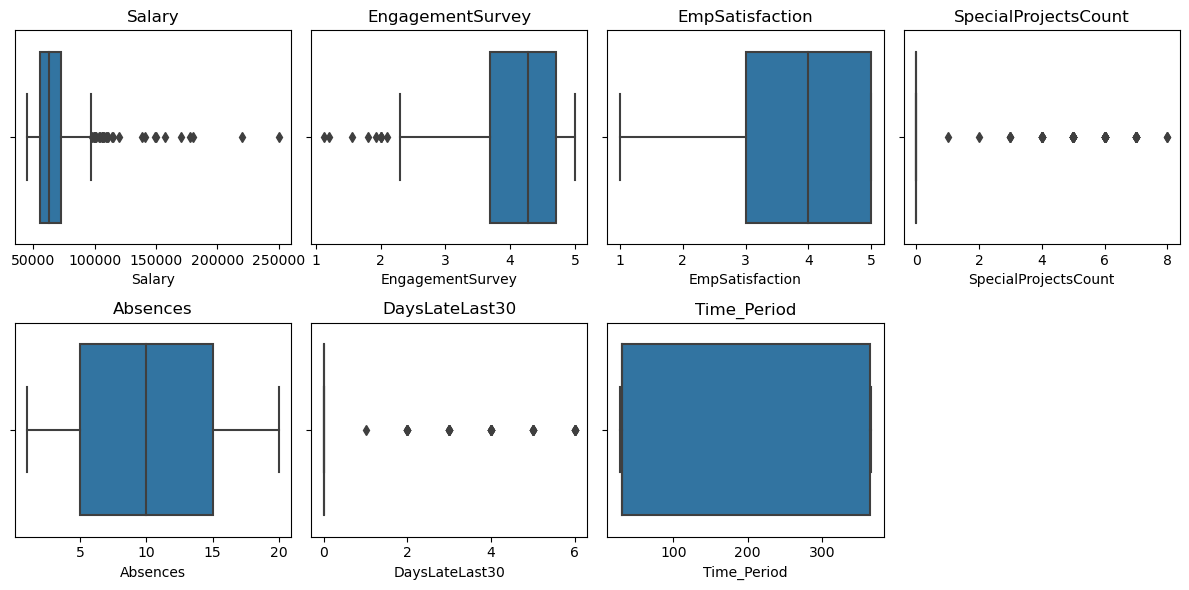

In [60]:

columns = ["Salary", "EngagementSurvey", "EmpSatisfaction", "SpecialProjectsCount", "Absences", "DaysLateLast30", "Time_Period"]

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 4, i)  # Create subplots in a 2x4 grid (adjust the number of columns in the grid if needed)
    sns.boxplot(x=HR[col], orient="vertical")  # Create a boxplot for the current column
    plt.title(col)  # Set the title for each subplot

plt.tight_layout()  # Ensures that the subplots don't overlap
plt.show()

<Axes: >

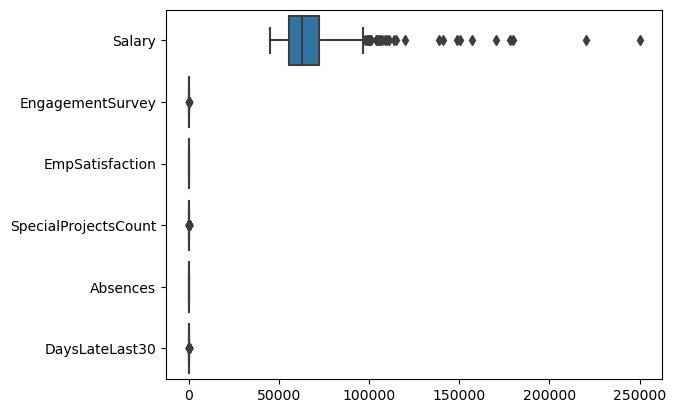

In [21]:
sns.boxplot(data = human_resources, orient = "h")

## Data Analysis

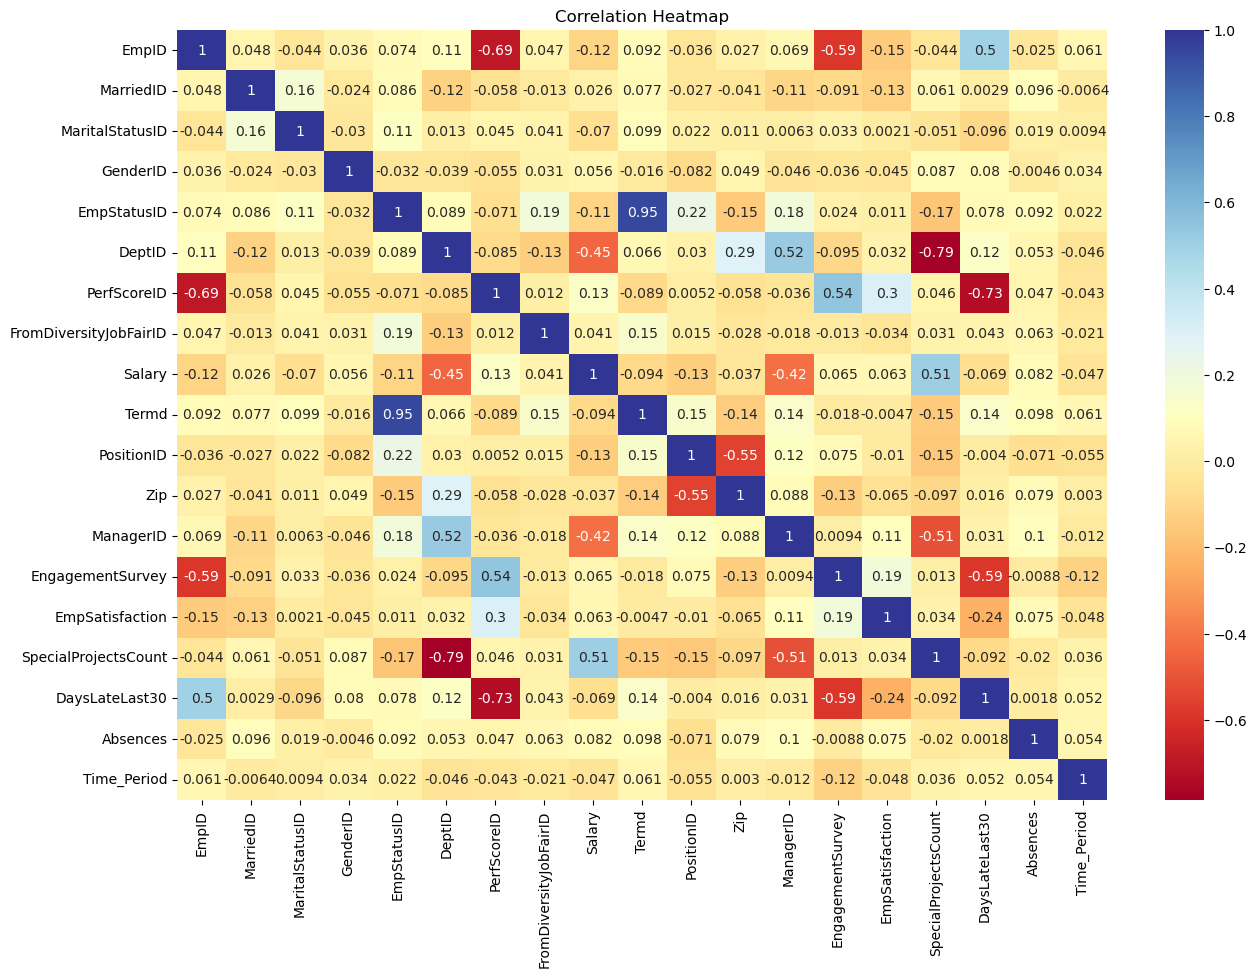

In [191]:
#Calculate  the correlation matrix
correlation_matrix = HR.corr()

# Create the correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot = True, cmap = "RdYlBu")
plt.title("Correlation Heatmap")
plt.show()

### Gender Analysis

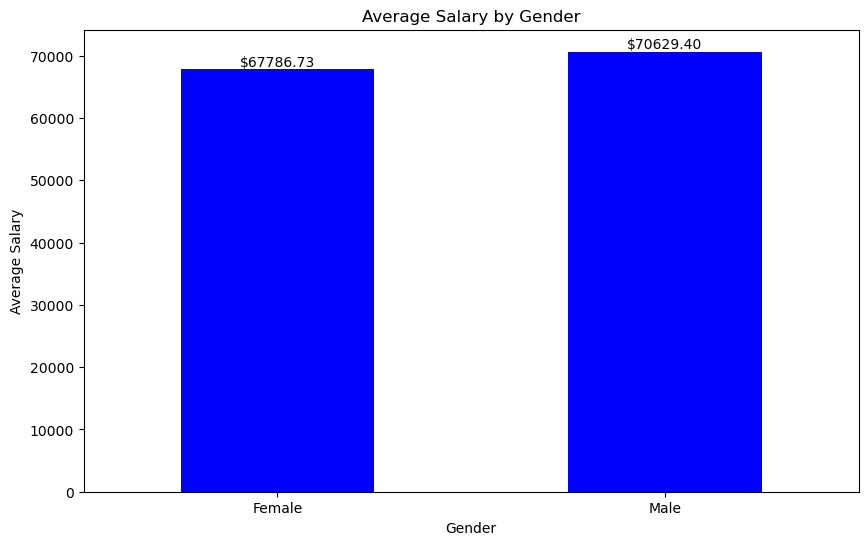

In [164]:
mapping = {0: 'Female', 1: 'Male'}
HR['GenderID'] = HR['GenderID'].replace(mapping)

average_salary = HR.groupby("GenderID")["Salary"].mean()

plt.figure(figsize=(10, 6))  # Adjust the figsize as per your preference
average_salary.plot(kind='bar', color='blue')
plt.title("Average Salary by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Salary")
plt.xticks(rotation=0)

# Add labels to the bars
for i, value in enumerate(average_salary):
    plt.text(i, value, f"${value:.2f}", ha='center', va='bottom')

plt.show()

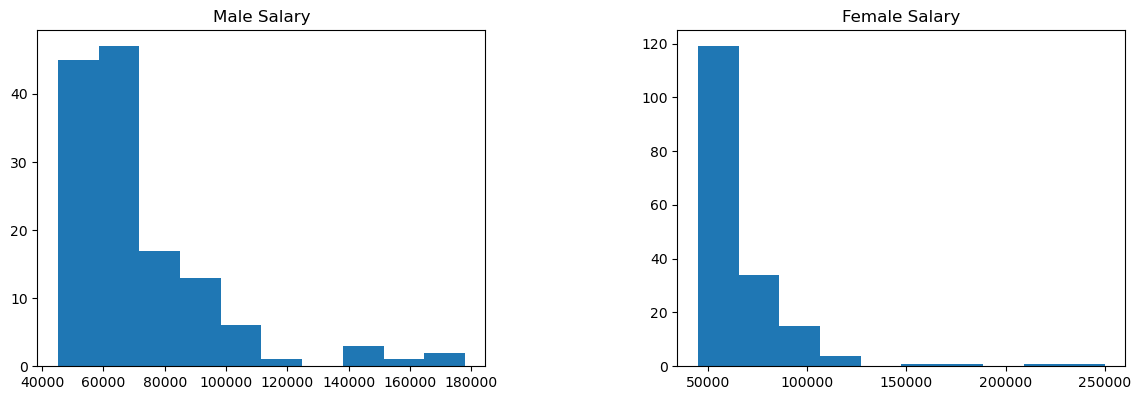

In [94]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.7, 0.7])
ax2 = fig.add_axes([1, 0, 0.7, 0.7])

ax1.hist(male_data["Salary"])
ax2.hist(female_data["Salary"])

ax1.set_title("Male Salary")
ax2.set_title("Female Salary")

plt.show()

In [95]:
female_data = HR[HR["GenderID"] == "Female"]
female_data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
2,"Akinkuolie, Sarah",10196,1,1,Female,5,5,3,0,64955,...,Kissy Sullivan,20,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,Female,1,5,3,0,64991,...,Elijiah Gray,16,Indeed,Fully Meets,4.84,5,0,01/03/2019,0,15
4,"Anderson, Carol",10069,0,2,Female,5,5,3,0,50825,...,Webster Butler,39,Google Search,Fully Meets,5.00,4,0,02/01/2016,0,2
5,"Anderson, Linda",10002,0,0,Female,1,5,4,0,57568,...,Amy Dunn,11,LinkedIn,Exceeds,5.00,5,0,01/07/2019,0,15
6,"Andreola, Colby",10194,0,0,Female,1,4,3,0,95660,...,Alex Sweetwater,10,LinkedIn,Fully Meets,3.04,3,4,01/02/2019,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Wolk, Hang T",10174,0,0,Female,1,5,3,0,60446,...,David Stanley,14,LinkedIn,Fully Meets,3.40,4,0,2/21/2019,0,14
307,"Ybarra, Catherine",10301,0,0,Female,5,5,1,0,48513,...,Brannon Miller,12,Google Search,PIP,3.20,2,0,09/02/2015,5,4
308,"Zamora, Jennifer",10010,0,0,Female,1,3,4,0,220450,...,Janet King,2,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,Female,1,3,3,0,89292,...,Simon Roup,4,Employee Referral,Fully Meets,5.00,3,5,02/01/2019,0,11


In [96]:
gen_depart = female_data.groupby(["GenderID"])["Position"].value_counts()
female_10 = gen_depart.head(10)
female_10

GenderID  Position                
Female    Production Technician I     83
          Production Technician II    37
          Area Sales Manager          12
          Production Manager           6
          Software Engineer            6
          IT Support                   5
          Database Administrator       4
          Administrative Assistant     3
          Data Analyst                 3
          Network Engineer             2
Name: Position, dtype: int64

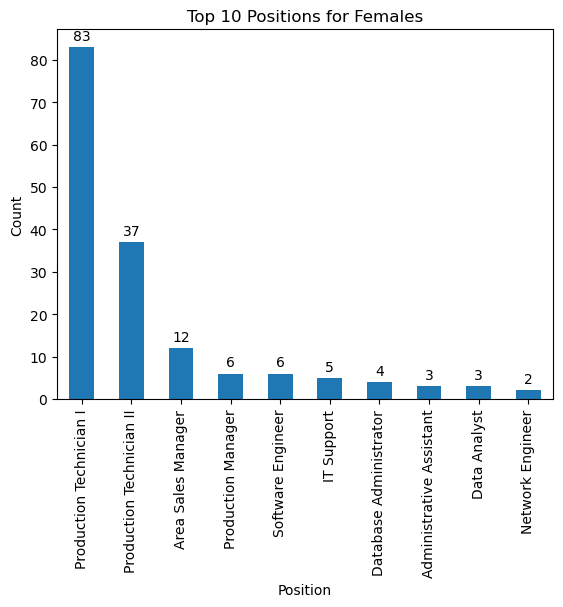

In [97]:
female_bar = female_10.plot(kind='bar', legend=False)

labels = [label[1] for label in female_10.index]
plt.gca().set_xticklabels(labels)

plt.title("Top 10 Positions for Females")
plt.xlabel("Position")
plt.ylabel("Count")

for bar in female_bar.patches:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha="center",
                 va="bottom")

plt.show()

In [98]:
male_data = HR[HR["GenderID"] == "Male"]
male_data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,Male,1,5,4,0,62506,...,Michael Albert,22,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,Male,5,3,3,0,104437,...,Simon Roup,4,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
7,"Athwal, Sam",10062,0,4,Male,1,5,3,0,59365,...,Ketsia Liebig,19,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
9,"Bacong, Alejandro",10250,0,2,Male,1,3,3,0,50178,...,Peter Monroe,7,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16
11,"Barbara, Thomas",10242,1,1,Male,5,5,3,1,47211,...,Kissy Sullivan,20,Diversity Job Fair,Fully Meets,4.20,3,0,05/06/2016,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,"Wang, Charlie",10172,0,0,Male,1,3,3,0,84903,...,Brian Champaigne,13,Indeed,Fully Meets,3.42,4,7,01/04/2019,0,17
300,"Whittier, Scott",10072,0,0,Male,5,5,3,0,58371,...,Webster Butler,39,LinkedIn,Fully Meets,5.00,5,0,5/15/2014,0,11
301,"Wilber, Barry",10048,1,1,Male,5,5,3,0,55140,...,Amy Dunn,11,Website,Fully Meets,5.00,3,0,2/15/2015,0,7
304,"Winthrop, Jordan",10033,0,0,Male,5,5,4,0,70507,...,Brannon Miller,12,LinkedIn,Exceeds,5.00,3,0,1/19/2016,0,7


In [99]:
gen_depart1 = male_data.groupby(["GenderID"])["Position"].value_counts()
male_10 = gen_depart1.head(10)

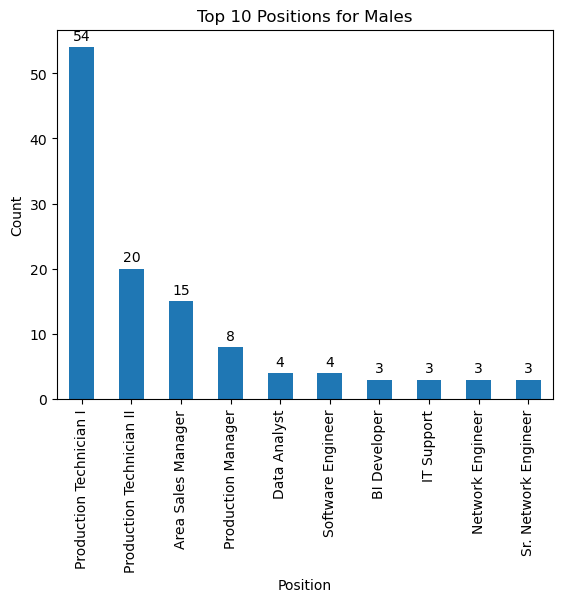

In [100]:
male_bar = male_10.plot(kind='bar', legend=False)

labels = [label[1] for label in male_10.index]
plt.gca().set_xticklabels(labels)

plt.title("Top 10 Positions for Males")
plt.xlabel("Position")
plt.ylabel("Count")

for bar in male_bar.patches:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha="center",
                 va="bottom")

plt.show()

#### All Careers Salary Split by Gender

In [101]:
salary = HR.groupby(["Position", "GenderID"]).agg({"Salary": "mean", "Employee_Name": "count"}).reset_index()
salary = salary.rename(columns={"Employee_Name": "Count"}).sort_values(by="Salary", ascending=False)

In [102]:
salary = HR.groupby(["Position", "GenderID"]).agg({"Salary": "mean", "Employee_Name": "count"}).reset_index()
salary = salary.rename(columns={"Employee_Name": "Count"})

# Split count by gender
gender_counts = salary.groupby(["Position", "GenderID"])["Count"].sum().reset_index()
gender_counts = gender_counts.pivot(index="Position", columns="GenderID", values="Count").reset_index()
gender_counts.columns = ["Position", "Female_Count", "Male_Count"]

# Merge gender counts with the salary DataFrame
salary = pd.merge(salary, gender_counts, on="Position")

salary = salary.sort_values(by="Salary", ascending=False)

salary_df = pd.DataFrame(salary)
salary_df = salary_df.drop(columns = ["GenderID", "Count"])

In [103]:
salary_df

,Position,Salary,Female_Count,Male_Count
26,President & CEO,250000.000000,1.0,NaN
8,CIO,220450.000000,1.0,NaN
16,Director of Sales,180000.000000,1.0,NaN
18,IT Director,178000.000000,NaN,1.0
15,Director of Operations,170500.000000,NaN,1.0
20,IT Manager - Infra,157000.000000,NaN,1.0
12,Data Architect,150290.000000,1.0,NaN
19,IT Manager - DB,144959.500000,NaN,2.0
21,IT Manager - Support,138888.000000,NaN,1.0
27,Principal Data Architect,120000.000000,1.0,NaN


In [63]:
department_gender = HR.groupby(["Department", "GenderID"]).size().reset_index(name="Count")

In [64]:
mapping = {0: 'Female', 1: 'Male'}
department_gender['GenderID'] = department_gender['GenderID'].replace(mapping)
department_gender

,Department,GenderID,Count
0,Admin Offices,Female,6
1,Admin Offices,Male,3
2,Executive Office,Female,1
3,IT/IS,Female,22
4,IT/IS,Male,28
5,Production,Female,126
6,Production,Male,83
7,Sales,Female,15
8,Sales,Male,16
9,Software Engineering,Female,6


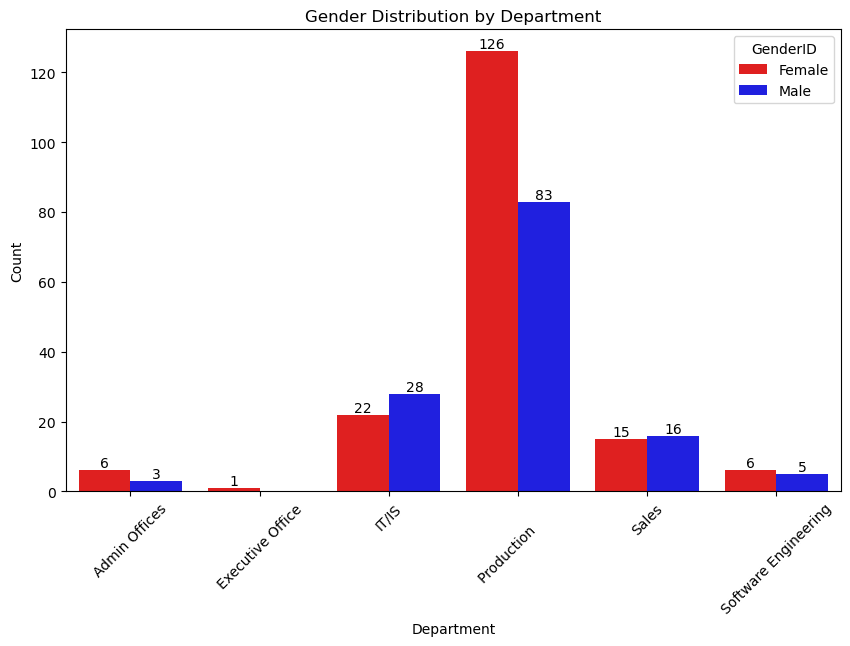

In [72]:
custom_palette = {'Male': 'blue', 'Female': 'red', 'Other': 'green'}

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a grouped bar chart using the 'hue' parameter and custom palette
sns.barplot(data=department_gender, x='Department', y='Count', hue='GenderID', palette=custom_palette)

# Add labels and title
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Gender Distribution by Department')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add count values to the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

In [74]:
HR

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Time_Period,Tenure
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,31,31 days
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,366,366 days
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,31,31 days
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Indeed,Fully Meets,4.84,5,0,01/03/2019,0,15,31,31 days
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Google Search,Fully Meets,5.00,4,0,02/01/2016,0,2,31,31 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13,31,31 days
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Google Search,PIP,3.20,2,0,09/02/2015,5,4,30,30 days
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16,30,30 days
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Employee Referral,Fully Meets,5.00,3,5,02/01/2019,0,11,366,366 days


In [84]:
HR

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Time_Period,Tenure
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,31,31 days
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,366,366 days
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,31,31 days
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Indeed,Fully Meets,4.84,5,0,01/03/2019,0,15,31,31 days
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Google Search,Fully Meets,5.00,4,0,02/01/2016,0,2,31,31 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13,31,31 days
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Google Search,PIP,3.20,2,0,09/02/2015,5,4,30,30 days
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16,30,30 days
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Employee Referral,Fully Meets,5.00,3,5,02/01/2019,0,11,366,366 days


In [106]:
recruitment_methods = HR.groupby("RecruitmentSource")["Employee_Name"].count().reset_index()
recruitment_methods

,RecruitmentSource,Employee_Name
0,CareerBuilder,23
1,Diversity Job Fair,29
2,Employee Referral,31
3,Google Search,49
4,Indeed,87
5,LinkedIn,76
6,On-line Web application,1
7,Other,2
8,Website,13


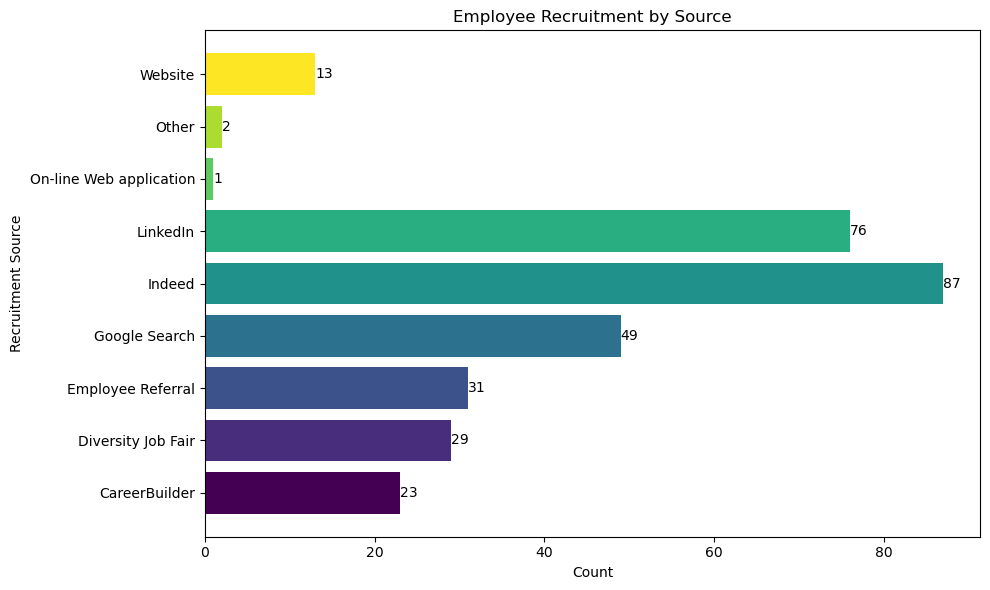

In [107]:
colors = plt.cm.viridis(np.linspace(0, 1, len(recruitment_methods)))

# Create the horizontal bar graph
plt.figure(figsize=(10, 6))
bars = plt.barh(recruitment_methods['RecruitmentSource'], recruitment_methods['Employee_Name'], color=colors)

# Add labels to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', ha='left', va='center')

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Recruitment Source')
plt.title('Employee Recruitment by Source')

# Show the plot
plt.tight_layout()
plt.show()

In [110]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   Employee_Name               311 non-null    object         
 1   EmpID                       311 non-null    int64          
 2   MarriedID                   311 non-null    int64          
 3   MaritalStatusID             311 non-null    int64          
 4   GenderID                    311 non-null    int64          
 5   EmpStatusID                 311 non-null    int64          
 6   DeptID                      311 non-null    int64          
 7   PerfScoreID                 311 non-null    int64          
 8   FromDiversityJobFairID      311 non-null    int64          
 9   Salary                      311 non-null    int64          
 10  Termd                       311 non-null    int64          
 11  PositionID                  311 non-null    i

In [112]:
department_performance = HR.groupby(["Department"]).agg({
    "Absences": "mean", 
    "Time_Period": "mean", 
    "SpecialProjectsCount" : "mean", 
    "EmpSatisfaction" : "mean",
    "Employee_Name": "count"}).reset_index()

department_performance

,Department,Absences,Time_Period,SpecialProjectsCount,EmpSatisfaction,Employee_Name
0,Admin Offices,8.666667,216.666667,3.666667,3.555556,9
1,Executive Office,10.000000,31.000000,0.000000,3.000000,1
2,IT/IS,10.440000,197.100000,5.920000,3.960000,50
3,Production,10.143541,177.985646,0.019139,3.861244,209
4,Sales,11.548387,181.838710,0.000000,4.032258,31
5,Software Engineering,8.727273,121.727273,4.181818,4.090909,11


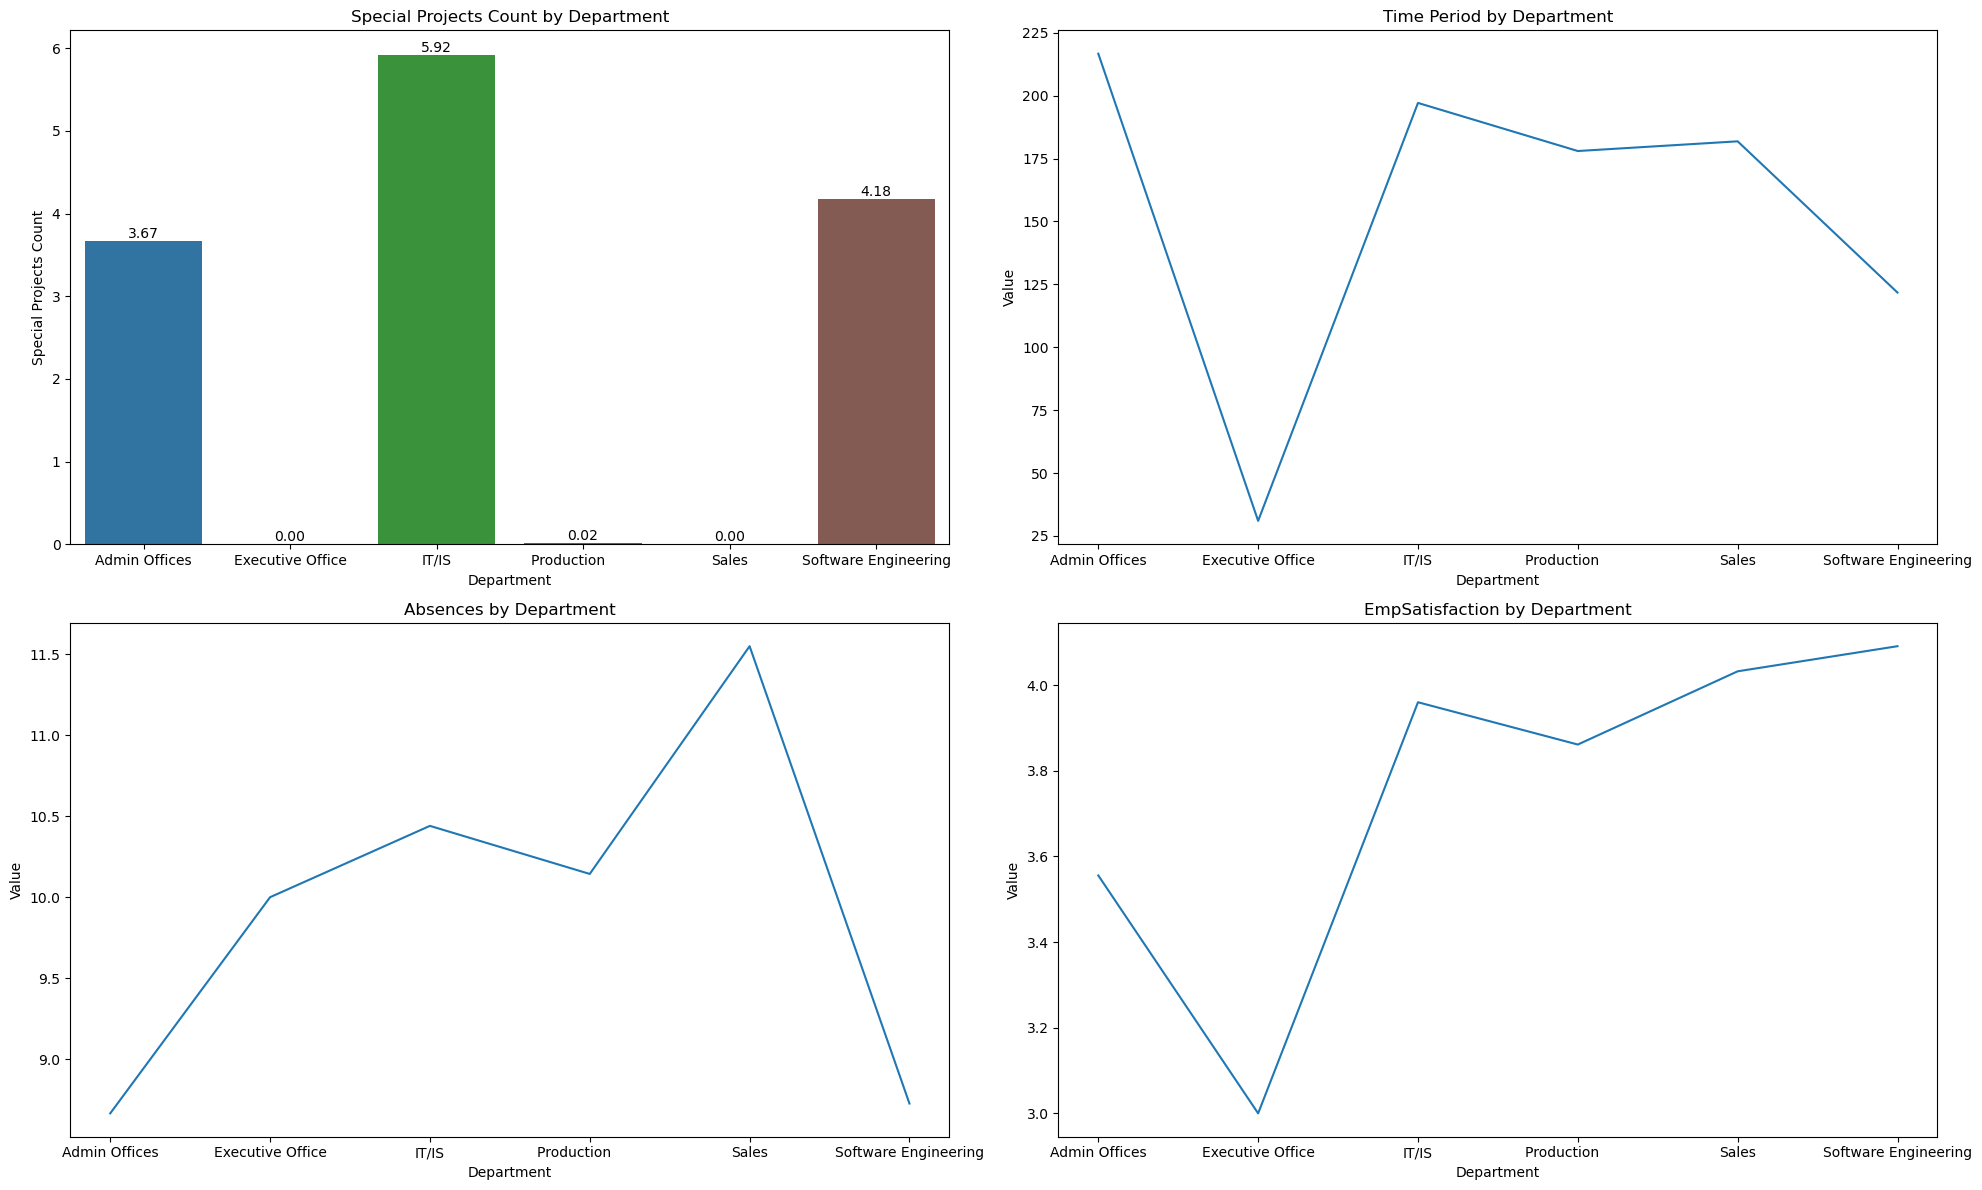

In [114]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# Plot SpecialProjectsCount as a barplot
sns.barplot(data=department_performance, x='Department', y='SpecialProjectsCount', ax=axes[0,0])
axes[0,0].set_xlabel('Department')
axes[0,0].set_ylabel('Special Projects Count')
axes[0,0].set_title('Special Projects Count by Department')

# Plot Absences as a line plot
sns.lineplot(data=department_performance, x='Department', y='Absences', ax=axes[1,0])
axes[1,0].set_xlabel('Department')
axes[1,0].set_ylabel('Value')
axes[1,0].set_title('Absences by Department')

# Plot Time_Period as a line plot
sns.lineplot(data=department_performance, x='Department', y='Time_Period', ax=axes[0,1])
axes[0,1].set_xlabel('Department')
axes[0,1].set_ylabel('Value')
axes[0,1].set_title('Time Period by Department')

# Plot EmpSatisfaction as a line plot
sns.lineplot(data=department_performance, x='Department', y='EmpSatisfaction', ax=axes[1,1])
axes[1,1].set_xlabel('Department')
axes[1,1].set_ylabel('Value')
axes[1,1].set_title('EmpSatisfaction by Department')

# Customize the legends in all plots
for p in axes[0,0].patches:
    axes[0,0].annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

# Adjust the layout
plt.tight_layout()

# Show the subplots
plt.show()

In [ ]:
department_insight = d

In [82]:


plt.figure(figsize = (10, 6))

sns.barplot(data=department_performance, x='Department', y='SpecialProjectsCount', hue='GenderID', palette=custom_palette)

# Add labels and title
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Gender Distribution by Department')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add count values to the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

ValueError: No axis named GenderID for object type DataFrame

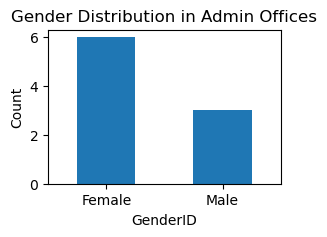

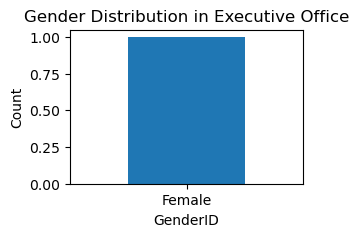

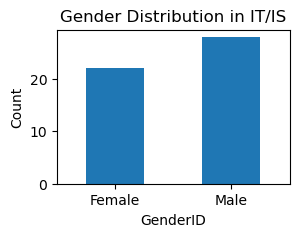

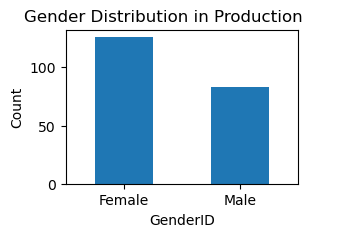

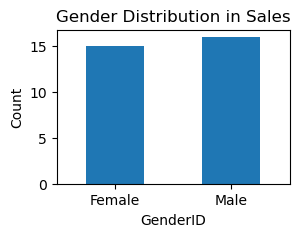

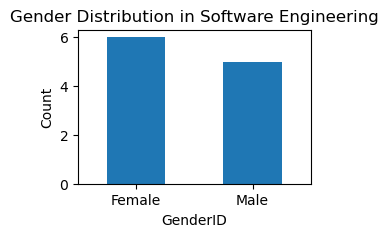

In [106]:
departments = department_gender['Department'].unique()
for department in departments:
    department_data = department_gender[department_gender['Department'] == department]
    
    # Reset the index for the department_data
    department_data = department_data.set_index('GenderID')
    
    # Plot the bar chart for the department with smaller size
    fig, ax = plt.subplots(figsize=(3, 2))  # Adjust the figsize as per your preference
    
    department_data.plot(kind='bar', legend=False, ax=ax)
    plt.title(f'Gender Distribution in {department}')
    plt.xlabel('GenderID')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()


## Department and Performance Score

In [116]:
depart_df = HR[["Department","Employee_Name","EmpID","PerformanceScore","EmpSatisfaction", "ManagerName", "TermReason", "DaysLateLast30", "Absences"]]
depart_df
depart_df1 = depart_df.groupby(["ManagerName"])["Employee_Name"].count().reset_index()
depart_df1
depart_df2 = depart_df.groupby(["Department"])["ManagerName"].count().reset_index()
depart_df2

,Department,ManagerName
0,Admin Offices,9
1,Executive Office,1
2,IT/IS,50
3,Production,209
4,Sales,31
5,Software Engineering,11


In [117]:
depart_df1

,ManagerName,Employee_Name
0,Alex Sweetwater,9
1,Amy Dunn,21
2,Board of Directors,2
3,Brandon R. LeBlanc,7
4,Brannon Miller,22
5,Brian Champaigne,8
6,David Stanley,21
7,Debra Houlihan,3
8,Elijiah Gray,22
9,Eric Dougall,4


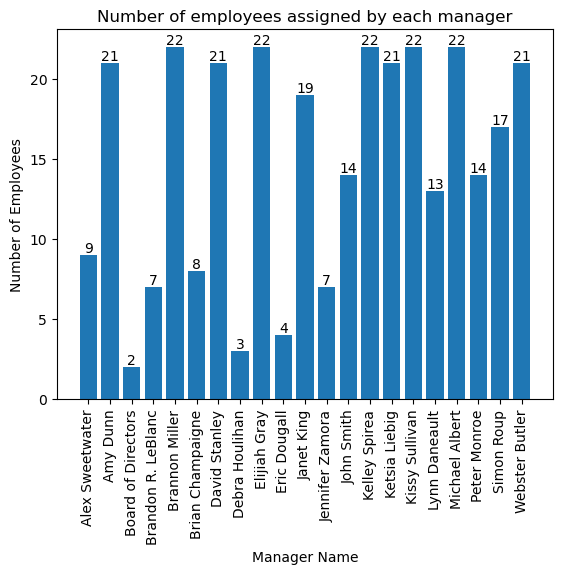

In [118]:
depart_df1 = depart_df1.rename(columns={"Employee_Name": "Count"})

plt.bar(depart_df1["ManagerName"], depart_df1["Count"])
plt.title("Number of employees assigned by each manager")
plt.xlabel("Manager Name")  # Add x-axis label
plt.ylabel("Number of Employees")  # Add y-axis label
plt.xticks(rotation="vertical")

# Add labels to the bars
for i, count in enumerate(depart_df1["Count"]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

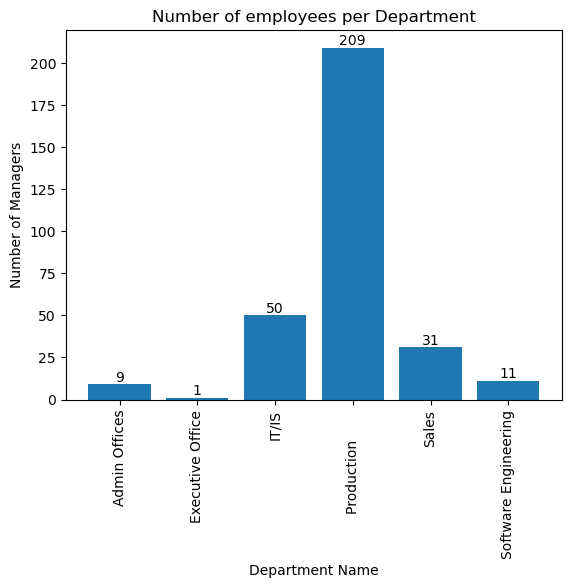

In [119]:
depart_df2 = depart_df2.rename(columns = {"ManagerName": "Count"})

plt.bar(depart_df2["Department"], depart_df2["Count"])
plt.title("Number of employees per Department")
plt.xlabel("Department Name")  # Add x-axis label
plt.ylabel("Number of Managers")  # Add y-axis label
plt.xticks(rotation="vertical")

for i, count in enumerate(depart_df2["Count"]):
    plt.text(i, count, str(count), ha="center", va= "bottom")
    
plt.show()

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a grouped bar chart using the 'hue' parameter and custom palette
sns.barplot(data=department_gender, x='Department', y='Count', hue='GenderID', palette=custom_palette)

# Add labels and title
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Gender Distribution by Department')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add count values to the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

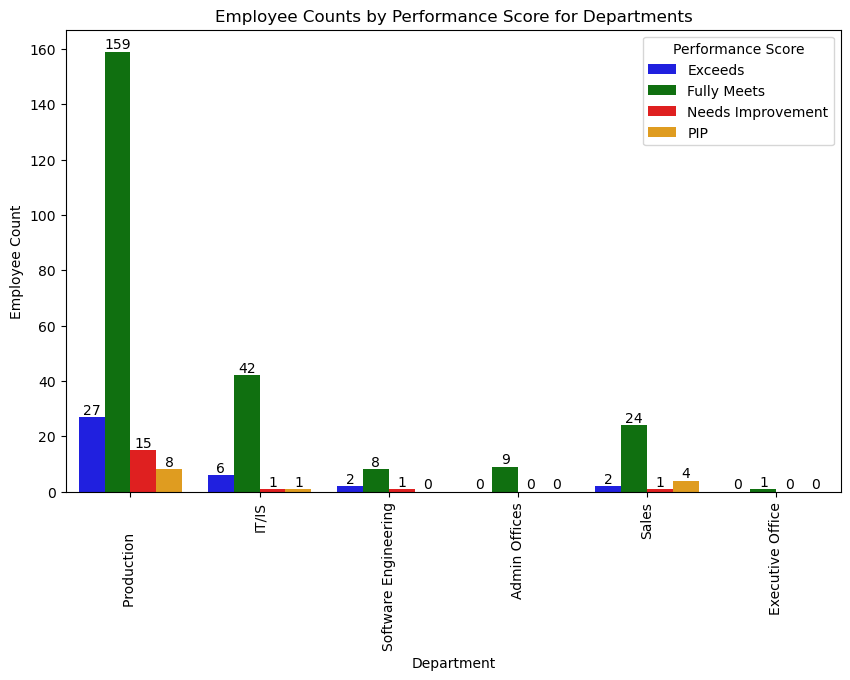

In [126]:
depart_df

custom_palette = {"Needs Improvement": "red", "Fully Meets": "green", "Exceeds": "blue", "PIP": "orange"}

plt.figure(figsize=(10, 6))

# Create a grouped bar chart
sns.countplot(data=depart_df, x="Department", hue="PerformanceScore", palette=custom_palette)

# Add labels and title
plt.xlabel('Department')
plt.ylabel('Employee Count')
plt.title('Employee Counts by Performance Score for Departments')

# Show the plot
plt.xticks(rotation='vertical')  # Set the rotation to 'vertical' for x-axis labels
plt.legend(title='Performance Score', loc='upper right')

# Add count values to the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')


plt.show()


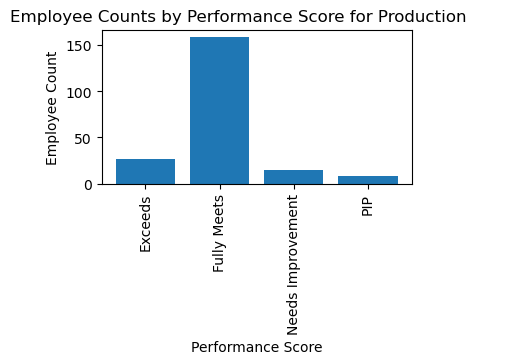

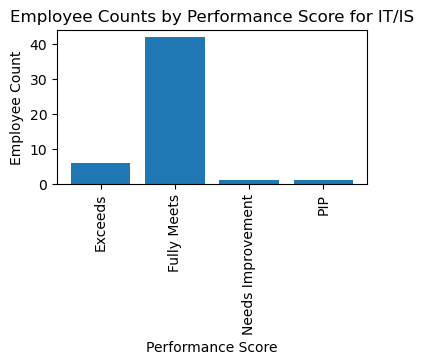

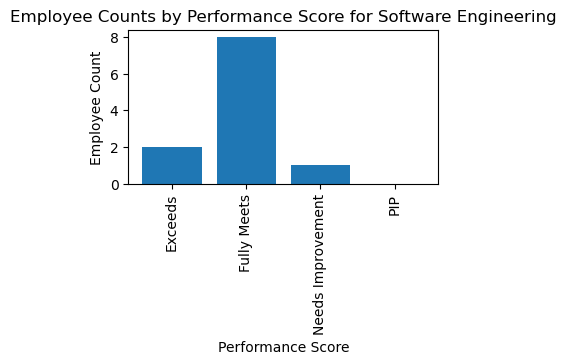

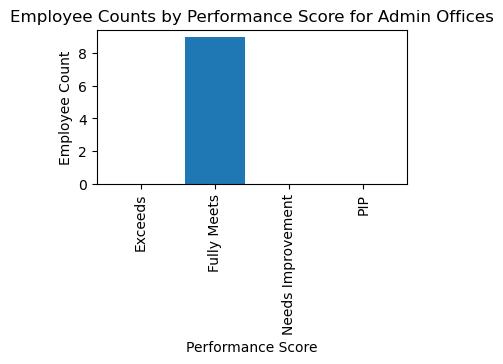

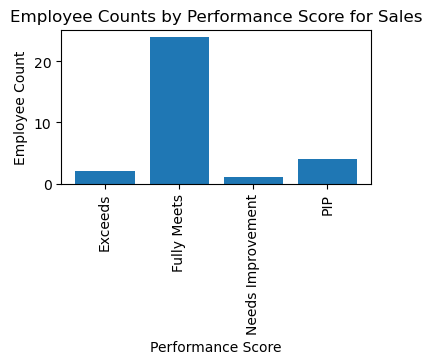

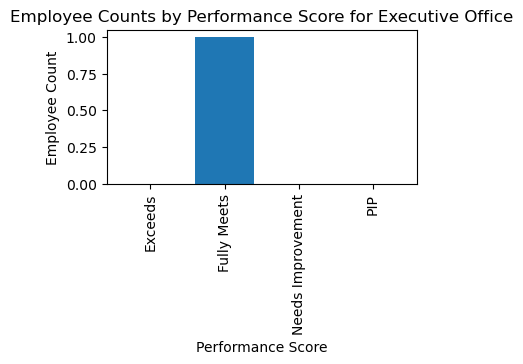

In [120]:
departments = depart_df["Department"].unique()
performance_scores = depart_df["PerformanceScore"].unique()

for department in departments:
    scores = []
    counts = []
    for score in performance_scores:
        count = depart_df[(depart_df["Department"] == department) & (depart_df["PerformanceScore"] == score)]["Employee_Name"].count()
        scores.append(score)
        counts.append(count)

    # Generate the bar chart
    plt.figure(figsize=(4, 2))
    plt.bar(scores, counts)
    plt.title(f"Employee Counts by Performance Score for {department}")
    plt.xlabel("Performance Score")
    plt.ylabel("Employee Count")
    plt.xticks(rotation='vertical')  # Set the rotation to 'vertical'
    plt.show()

#### Number of employees in each Department performing above expectations

In [128]:
exceeds

,Department,Employee_Name,EmpID,PerformanceScore,EmpSatisfaction,ManagerName,TermReason,DaysLateLast30,Absences
0,Production,"Adinolfi, Wilson K",10026,Exceeds,5,Michael Albert,N/A-StillEmployed,0,1
5,Production,"Anderson, Linda",10002,Exceeds,5,Amy Dunn,N/A-StillEmployed,0,15
12,IT/IS,"Barbossa, Hector",10012,Exceeds,4,Simon Roup,N/A-StillEmployed,0,9
16,Production,"Beak, Kimberly",10023,Exceeds,3,Kelley Spirea,N/A-StillEmployed,0,16
22,Production,"Billis, Helen",10003,Exceeds,3,Brannon Miller,N/A-StillEmployed,0,19
36,Production,"Candie, Calvin",10001,Exceeds,3,Janet King,N/A-StillEmployed,0,14
51,Production,"Clukey, Elijian",10029,Exceeds,4,Brannon Miller,N/A-StillEmployed,0,5
55,Production,"Corleone, Vito",10019,Exceeds,5,Janet King,N/A-StillEmployed,0,15
76,IT/IS,"Dougall, Eric",10028,Exceeds,5,Jennifer Zamora,N/A-StillEmployed,0,4
77,Sales,"Driver, Elle",10006,Exceeds,5,Lynn Daneault,N/A-StillEmployed,0,14


In [127]:
exceeds = depart_df[depart_df["PerformanceScore"] == "Exceeds"]
exceeds_1 = exceeds.groupby(["Department"])["PerformanceScore"].count().reset_index()
exceeds_1 = exceeds_1.rename(columns = {"PerformanceScore": "Count"})
exceeds_1 

,Department,Count
0,IT/IS,6
1,Production,27
2,Sales,2
3,Software Engineering,2


#### Number of employees in each Department performing below expectations

In [175]:
needsimprovement = depart_df[depart_df["PerformanceScore"] == "Needs Improvement"]
needs_improvement_1 = needsimprovement.groupby(["Department"])["PerformanceScore"].count().reset_index()
needs_improvement_1 = needs_improvement_1.rename(columns = {"PerformanceScore": "Count"})
needs_improvement_1

,Department,Count
0,IT/IS,1
1,Production,15
2,Sales,1
3,Software Engineering,1


In [111]:
production = exceeds[exceeds["Department"] == "Production       "]

#### Number of employees per Production performing above expectations

In [112]:
production

,Department,Employee_Name,EmpID,PerformanceScore,EmpSatisfaction,ManagerName,TermReason,DaysLateLast30,Absences
0,Production,"Adinolfi, Wilson K",10026,Exceeds,5,Michael Albert,N/A-StillEmployed,0,1
5,Production,"Anderson, Linda",10002,Exceeds,5,Amy Dunn,N/A-StillEmployed,0,15
16,Production,"Beak, Kimberly",10023,Exceeds,3,Kelley Spirea,N/A-StillEmployed,0,16
22,Production,"Billis, Helen",10003,Exceeds,3,Brannon Miller,N/A-StillEmployed,0,19
36,Production,"Candie, Calvin",10001,Exceeds,3,Janet King,N/A-StillEmployed,0,14
51,Production,"Clukey, Elijian",10029,Exceeds,4,Brannon Miller,N/A-StillEmployed,0,5
55,Production,"Corleone, Vito",10019,Exceeds,5,Janet King,N/A-StillEmployed,0,15
106,Production,"Girifalco, Evelyn",10018,Exceeds,4,Amy Dunn,N/A-StillEmployed,0,3
111,Production,"Gonzalez, Cayo",10031,Exceeds,4,Brannon Miller,N/A-StillEmployed,0,1
125,Production,"Harrison, Kara",10007,Exceeds,4,Amy Dunn,N/A-StillEmployed,0,5


#### Number of employees per IT performing above expectations

In [113]:
IT = exceeds[exceeds["Department"] == "IT/IS"]
IT

,Department,Employee_Name,EmpID,PerformanceScore,EmpSatisfaction,ManagerName,TermReason,DaysLateLast30,Absences
12,IT/IS,"Barbossa, Hector",10012,Exceeds,4,Simon Roup,N/A-StillEmployed,0,9
76,IT/IS,"Dougall, Eric",10028,Exceeds,5,Jennifer Zamora,N/A-StillEmployed,0,4
96,IT/IS,"Foss, Jason",10015,Exceeds,5,Jennifer Zamora,N/A-StillEmployed,0,15
170,IT/IS,"Lindsay, Leonara",10008,Exceeds,4,Eric Dougall,N/A-StillEmployed,0,14
220,IT/IS,"Petrowsky, Thelma",10016,Exceeds,5,Simon Roup,N/A-StillEmployed,0,16
308,IT/IS,"Zamora, Jennifer",10010,Exceeds,5,Janet King,N/A-StillEmployed,0,16


#### Number of employees per Sales performing ahead of expectations

In [142]:
Sales = exceeds[exceeds["Department"] == "Sales"]
Sales

,Department,Employee_Name,EmpID,PerformanceScore,EmpSatisfaction,ManagerName,TermReason,DaysLateLast30,Absences
77,Sales,"Driver, Elle",10006,Exceeds,5,Lynn Daneault,N/A-StillEmployed,0,14
282,Sales,"Torrence, Jack",10013,Exceeds,3,Lynn Daneault,N/A-StillEmployed,0,6


#### Number of employees per Software Engineer performing ahead of expectations

In [143]:
Software_engineer = exceeds[exceeds["Department"] == "Software Engineering"]
Software_engineer

,Department,Employee_Name,EmpID,PerformanceScore,EmpSatisfaction,ManagerName,TermReason,DaysLateLast30,Absences
212,Software Engineering,"Patronick, Lucas",10005,Exceeds,5,Alex Sweetwater,Another position,0,13
274,Software Engineering,"Szabo, Andrew",10024,Exceeds,5,Alex Sweetwater,N/A-StillEmployed,0,1


#### Number of employees per Manager which are performing ahead of expectations

In [144]:
exceeds_2 = exceeds.groupby(["ManagerName"])["Employee_Name"].count().reset_index()
exceeds_2

,ManagerName,Employee_Name
0,Alex Sweetwater,2
1,Amy Dunn,3
2,Brannon Miller,7
3,David Stanley,1
4,Elijiah Gray,2
5,Eric Dougall,1
6,Janet King,4
7,Jennifer Zamora,2
8,Kelley Spirea,3
9,Ketsia Liebig,2


#### Number of employees per Manager which are not performing enough

In [145]:
needs_improvement_2 = needsimprovement.groupby(["ManagerName"])["Employee_Name"].count().reset_index()
needs_improvement_2

NameError: name 'needsimprovement' is not defined

#### Workers with unsatisfactory performance scores in Production

In [146]:
production2 = needsimprovement[needsimprovement["Department"] == "Production       "]
production2

NameError: name 'needsimprovement' is not defined

### Employees terminated per department

In [147]:
termin_df = HR[["Employee_Name", "EmpID", "Department", "EmploymentStatus", "TermReason"]]
termin_df

,Employee_Name,EmpID,Department,EmploymentStatus,TermReason
0,"Adinolfi, Wilson K",10026,Production,Active,N/A-StillEmployed
1,"Ait Sidi, Karthikeyan",10084,IT/IS,Voluntarily Terminated,career change
2,"Akinkuolie, Sarah",10196,Production,Voluntarily Terminated,hours
3,"Alagbe,Trina",10088,Production,Active,N/A-StillEmployed
4,"Anderson, Carol",10069,Production,Voluntarily Terminated,return to school
...,...,...,...,...,...
306,"Woodson, Jason",10135,Production,Active,N/A-StillEmployed
307,"Ybarra, Catherine",10301,Production,Voluntarily Terminated,Another position
308,"Zamora, Jennifer",10010,IT/IS,Active,N/A-StillEmployed
309,"Zhou, Julia",10043,IT/IS,Active,N/A-StillEmployed


In [148]:
termin_df2 = termin_df[termin_df["EmploymentStatus"] == "Terminated for Cause"]
termin_df3 = termin_df[termin_df["EmploymentStatus"] == "Voluntarily Terminated"]

depart_termin2 = termin_df2.groupby(["Department"])["EmploymentStatus"].count().reset_index()
depart_termin3 = termin_df3.groupby(["Department"])["EmploymentStatus"].count().reset_index()

# Merge depart_termin2 and depart_termin3 based on "Department" column
depart_termin_total = pd.merge(depart_termin2, depart_termin3, on="Department", how="outer")

# Add the two counts together to get the total
depart_termin_total["TotalTerminated"] = depart_termin_total["EmploymentStatus_x"] + depart_termin_total["EmploymentStatus_y"]

# Rename the columns
depart_termin_total = depart_termin_total.rename(columns={"TotalTerminated": "Total_Terminated"})

# Drop unnecessary columns
depart_termin_total = depart_termin_total.drop(columns=["EmploymentStatus_x", "EmploymentStatus_y"])

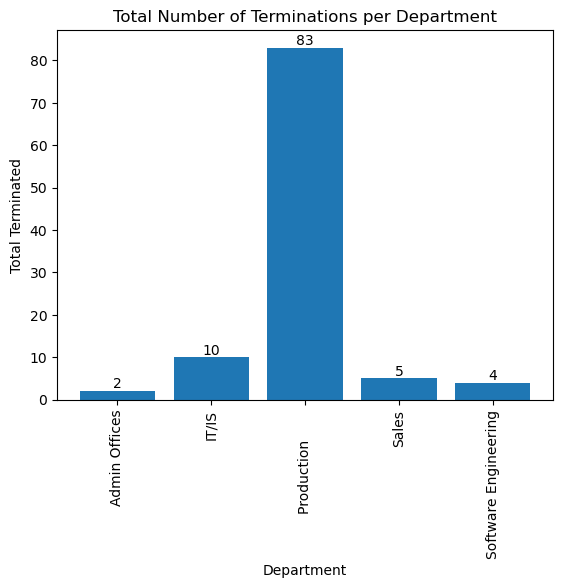

In [149]:
depart_termin_total

plt.bar(depart_termin_total["Department"], depart_termin_total["Total_Terminated"])

# Add x-axis label
plt.xlabel("Department")
# Add y-axis label
plt.ylabel("Total Terminated")

# Rotate x-axis labels vertically
plt.xticks(rotation="vertical")

# Add labels to the bars
for i, value in enumerate(depart_termin_total["Total_Terminated"]):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Add a title
plt.title("Total Number of Terminations per Department")

plt.show()

In [164]:
# Concatenate the two DataFrames vertically (along rows)
combined_df = pd.concat([termin_df2, termin_df3], axis=0)

# Reset the index of the combined DataFrame
combined_df.reset_index(drop=True, inplace=True)

In [166]:
termin_df3

,Employee_Name,EmpID,Department,EmploymentStatus,TermReason
1,"Ait Sidi, Karthikeyan",10084,IT/IS,Voluntarily Terminated,career change
2,"Akinkuolie, Sarah",10196,Production,Voluntarily Terminated,hours
4,"Anderson, Carol",10069,Production,Voluntarily Terminated,return to school
10,"Baczenski, Rachael",10252,Production,Voluntarily Terminated,Another position
11,"Barbara, Thomas",10242,Production,Voluntarily Terminated,unhappy
...,...,...,...,...,...
301,"Wilber, Barry",10048,Production,Voluntarily Terminated,unhappy
302,"Wilkes, Annie",10204,Production,Voluntarily Terminated,Another position
303,"Williams, Jacquelyn",10264,Production,Voluntarily Terminated,relocation out of area
304,"Winthrop, Jordan",10033,Production,Voluntarily Terminated,retiring


In [184]:
termin = termin_df3.groupby(["TermReason", "Department"])["Employee_Name"].count().reset_index()
termin

termin_s = termin_df2.groupby(["TermReason", "Department"])["Employee_Name"].count().reset_index()
termin_s

,TermReason,Department,Employee_Name
0,Fatal attraction,Sales,1
1,Learned that he is a gangster,IT/IS,1
2,attendance,Production,4
3,attendance,Sales,1
4,attendance,Software Engineering,1
5,gross misconduct,Production,1
6,"no-call, no-show",Admin Offices,1
7,"no-call, no-show",IT/IS,2
8,"no-call, no-show",Production,1
9,performance,IT/IS,1


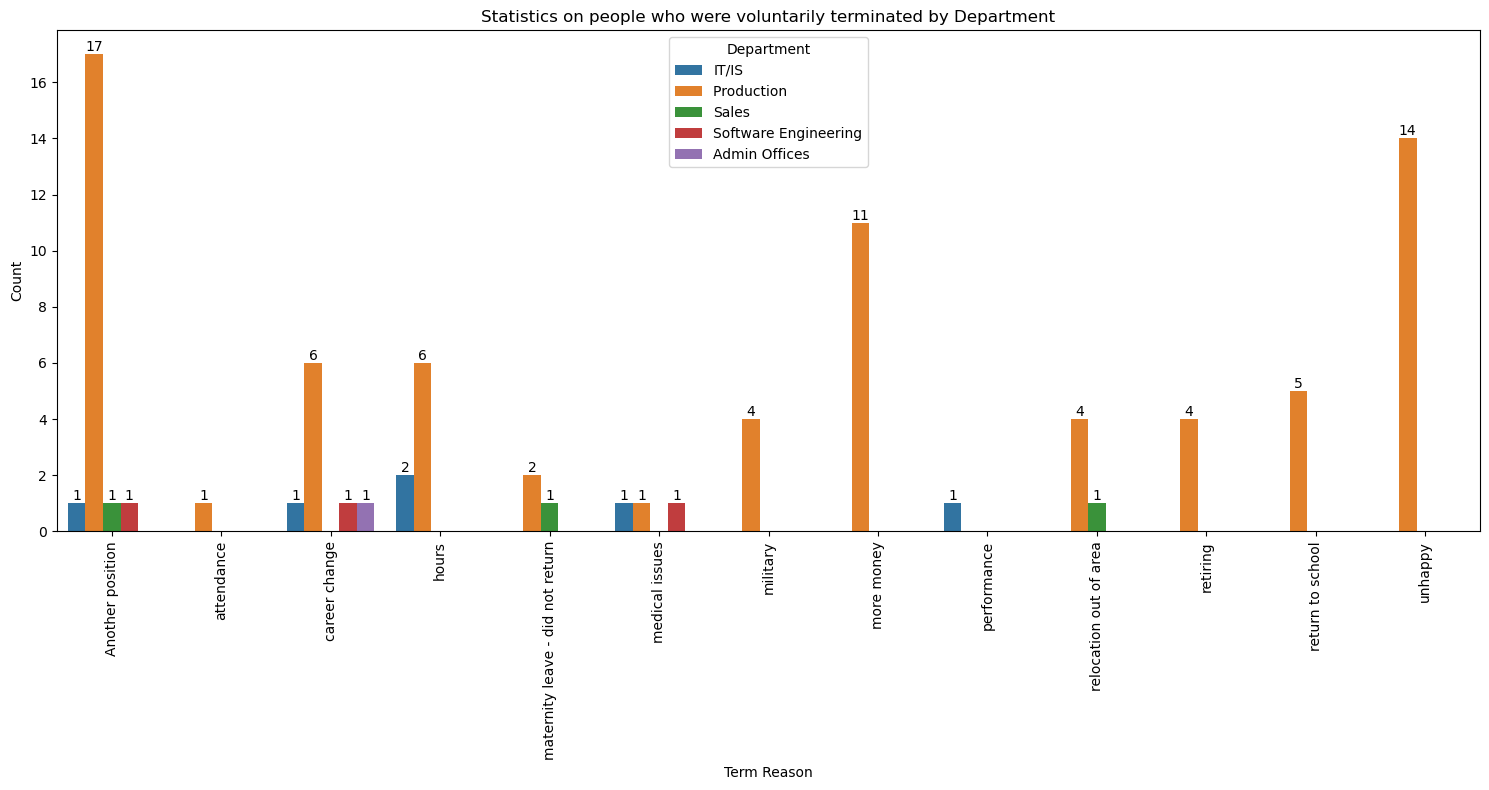

In [181]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=termin, x="TermReason", y="Employee_Name", hue="Department")

# Customize labels and title
plt.title("Statistics on people who were voluntarily terminated by Department")
plt.xlabel("Term Reason")
plt.ylabel("Count")

# Rotate x-axis labels to be vertical
plt.xticks(rotation="vertical")

# Annotate bars with their values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

# Move the legend to the top-right corner
plt.legend(title='Department', loc='upper center')

# Show the plot
plt.tight_layout()
plt.show()

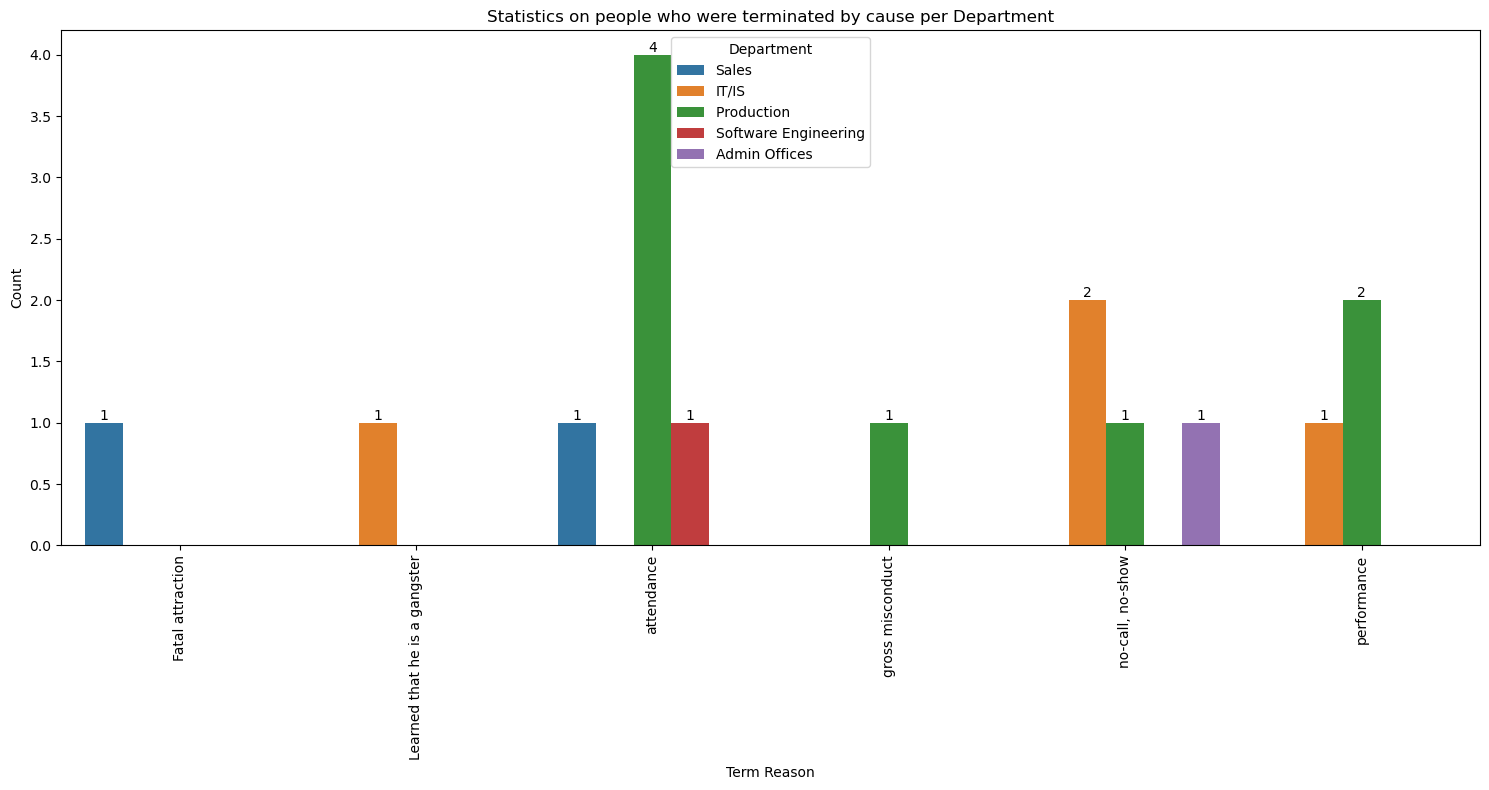

In [187]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=termin_s, x="TermReason", y="Employee_Name", hue="Department")

# Customize labels and title
plt.title("Statistics on people who were terminated by cause per Department")
plt.xlabel("Term Reason")
plt.ylabel("Count")

# Rotate x-axis labels to be vertical
plt.xticks(rotation="vertical")

# Annotate bars with their values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

# Move the legend to the top-right corner
plt.legend(title='Department', loc='upper center')

# Show the plot
plt.tight_layout()
plt.show()

In [173]:
termin1 = pd.DataFrame(termin_df3.TermReason.value_counts().reset_index())
termin1 = termin1.rename(columns = {"TermReason": "Count", "index": "Term_Reason"})
termin1

,Term_Reason,Count
0,Another position,20
1,unhappy,14
2,more money,11
3,career change,9
4,hours,8
5,return to school,5
6,relocation out of area,5
7,retiring,4
8,military,4
9,maternity leave - did not return,3


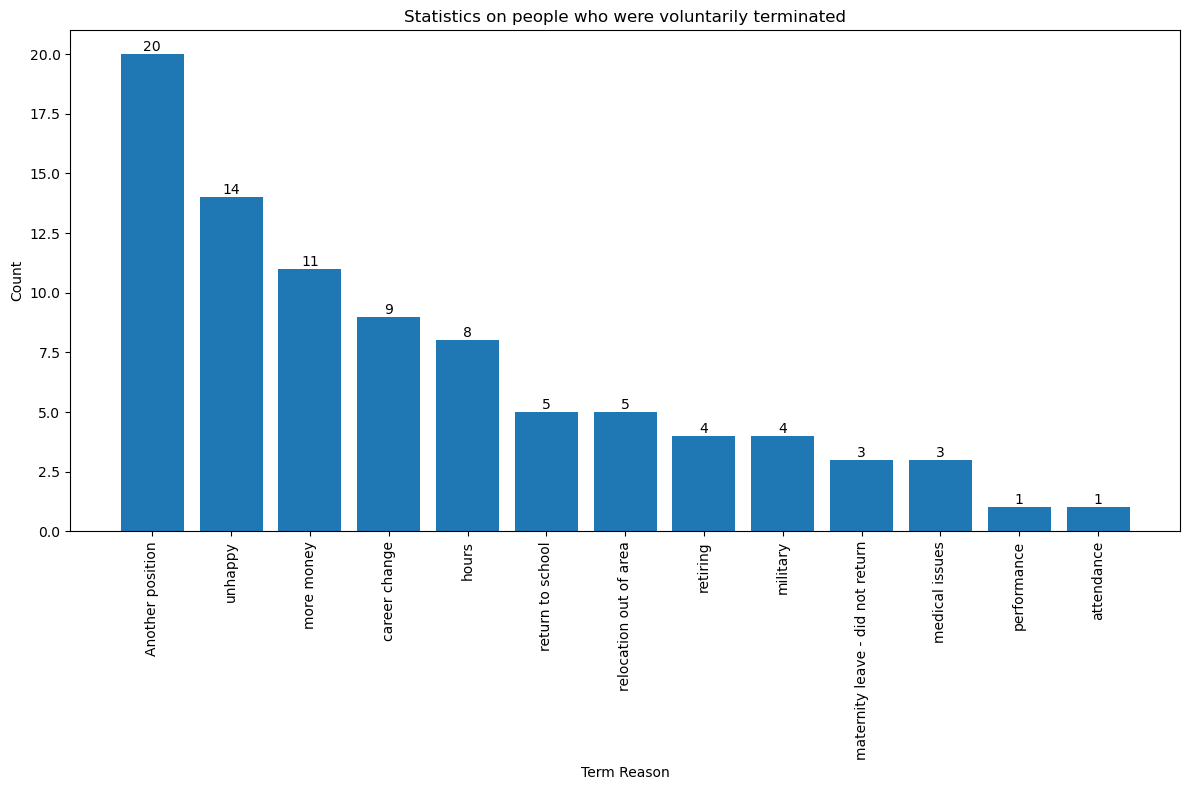

In [177]:
plt.figure(figsize=(12, 8))
bars = plt.bar(termin1["Term_Reason"], height=termin1["Count"])

# Customize labels and title
plt.title("Statistics on people who were voluntarily terminated")
plt.xlabel("Term Reason")
plt.ylabel("Count")

# Rotate x-axis labels to be vertical
plt.xticks(rotation="vertical")

# Annotate bars with their values
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [152]:
termin_1 = pd.DataFrame(termin_df2.TermReason.value_counts().reset_index())

termin_1 = termin_1.rename(columns = {"TermReason": "Count", "index": "Term_Reason"})
termin_1

,Term_Reason,Count
0,attendance,6
1,"no-call, no-show",4
2,performance,3
3,Learned that he is a gangster,1
4,Fatal attraction,1
5,gross misconduct,1


In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=termin, x="TermReason", y="Employee_Name", hue="Department")

# Customize labels and title
plt.title("Statistics on people who were voluntarily terminated by Department")
plt.xlabel("Term Reason")
plt.ylabel("Count")

# Rotate x-axis labels to be vertical
plt.xticks(rotation="vertical")

# Annotate bars with their values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

# Move the legend to the top-right corner
plt.legend(title='Department', loc='upper center')

# Show the plot
plt.tight_layout()
plt.show()

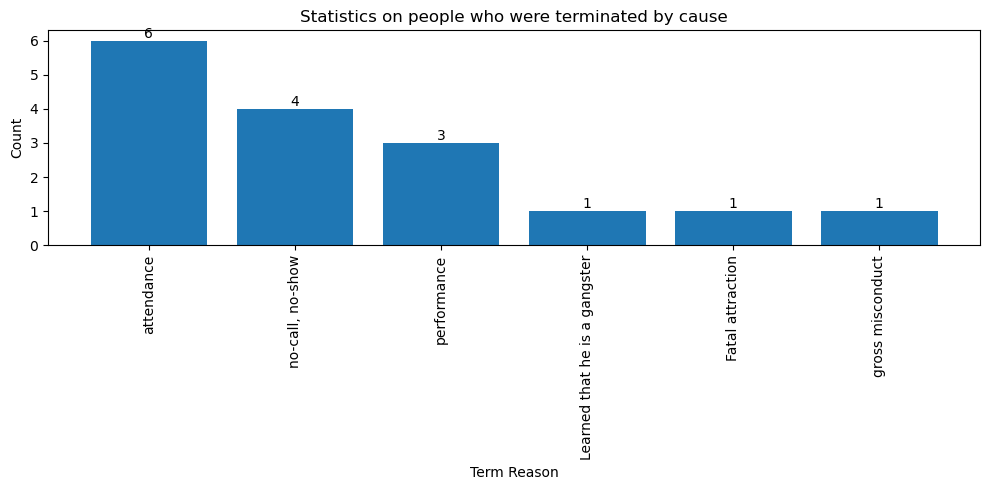

In [190]:

plt.figure(figsize=(10, 5))
bars = plt.bar(termin_1["Term_Reason"], height=termin_1["Count"])

# Customize labels and title
plt.title("Statistics on people who were terminated by cause")
plt.xlabel("Term Reason")
plt.ylabel("Count")

# Rotate x-axis labels to be vertical
plt.xticks(rotation="vertical")

# Annotate bars with their values
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [155]:
termin_df["Department"] = HR["Department"]

C:\Users\rgs88\AppData\Local\Temp\ipykernel_19696\3518673272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  termin_df["Department"] = HR["Department"]


In [156]:
depart_terminv = termin_df[termin_df["EmploymentStatus"] == "Voluntarily Terminated"].groupby("Department").size().reset_index(name="Voluntary_Termination_Count")
depart_terminv

depart_terminc = termin_df[termin_df["EmploymentStatus"] == "Terminated for Cause"].groupby("Department").size().reset_index(name="Termination_for_Cause_Count")
depart_terminc

,Department,Termination_for_Cause_Count
0,Admin Offices,1
1,IT/IS,4
2,Production,8
3,Sales,2
4,Software Engineering,1


In [157]:
departed_termin = depart_terminv.join(depart_terminc.set_index("Department"), on="Department")
departed_termin

departed_termin["Total_Number_Terminated"] = departed_termin["Voluntary_Termination_Count"] + departed_termin["Termination_for_Cause_Count"]
departed_termin

,Department,Voluntary_Termination_Count,Termination_for_Cause_Count,Total_Number_Terminated
0,Admin Offices,1,1,2
1,IT/IS,6,4,10
2,Production,75,8,83
3,Sales,3,2,5
4,Software Engineering,3,1,4


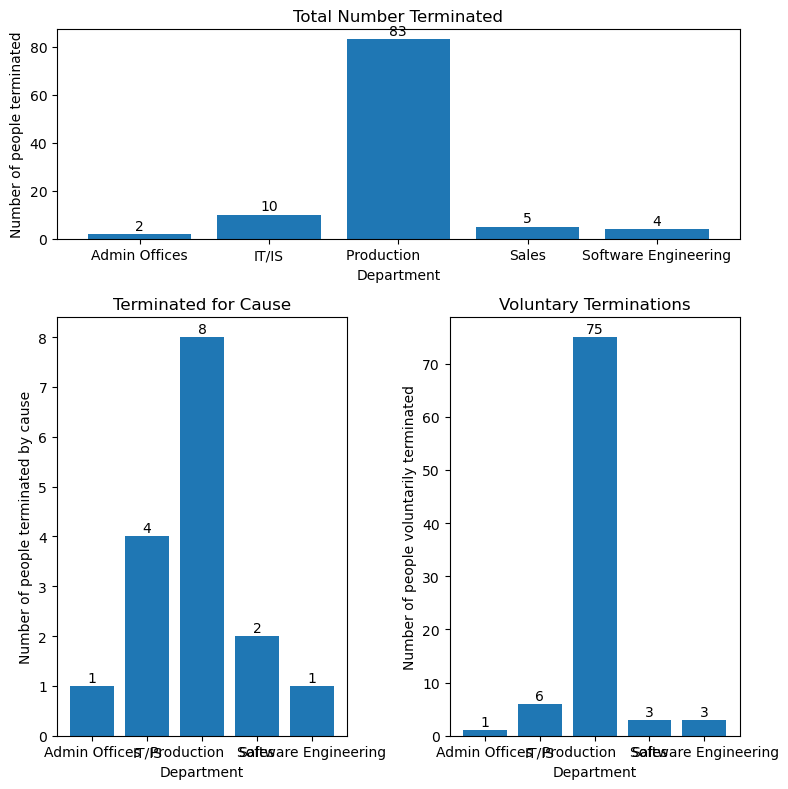

In [161]:
from matplotlib.gridspec import GridSpec

# Create the figure and define the grid layout
fig = plt.figure(figsize=(8, 8))
gs = GridSpec(2, 2, figure=fig, height_ratios=[1, 2])

# Plot the first graph at the top
ax1 = fig.add_subplot(gs[0, :])
ax1.bar(departed_termin["Department"], departed_termin["Total_Number_Terminated"])
ax1.set_xlabel("Department")
ax1.set_ylabel("Number of people terminated")
ax1.set_title("Total Number Terminated")

# Annotate the height values on the first graph
for i, height in enumerate(departed_termin["Total_Number_Terminated"]):
    ax1.annotate(str(height), xy=(i, height), xytext=(0, 3), textcoords="offset points", ha='center')

# Plot the second graph on the bottom left
ax2 = fig.add_subplot(gs[1, 0])
ax2.bar(departed_termin["Department"], departed_termin["Termination_for_Cause_Count"])
ax2.set_xlabel("Department")
ax2.set_ylabel("Number of people terminated by cause")
ax2.set_title("Terminated for Cause")

# Annotate the height values on the second graph
for i, height in enumerate(departed_termin["Termination_for_Cause_Count"]):
    ax2.annotate(str(height), xy=(i, height), xytext=(0, 3), textcoords="offset points", ha='center')

# Plot the third graph on the bottom right
ax3 = fig.add_subplot(gs[1, 1])
ax3.bar(departed_termin["Department"], departed_termin["Voluntary_Termination_Count"])
ax3.set_xlabel("Department")
ax3.set_ylabel("Number of people voluntarily terminated")
ax3.set_title("Voluntary Terminations")

# Annotate the height values on the third graph
for i, height in enumerate(departed_termin["Voluntary_Termination_Count"]):
    ax3.annotate(str(height), xy=(i, height), xytext=(0, 3), textcoords="offset points", ha='center')

# Remove the unused subplot
#fig.delaxes(ax3)

plt.tight_layout()
plt.show()





### Manager Analysis

In [130]:
manager_df = HR[["ManagerName", "ManagerID", "EngagementSurvey", "EmpSatisfaction"]]
manager_df

,ManagerName,ManagerID,EngagementSurvey,EmpSatisfaction
0,Michael Albert,22,4.60,5
1,Simon Roup,4,4.96,3
2,Kissy Sullivan,20,3.02,3
3,Elijiah Gray,16,4.84,5
4,Webster Butler,39,5.00,4
...,...,...,...,...
306,Kissy Sullivan,20,4.07,4
307,Brannon Miller,12,3.20,2
308,Janet King,2,4.60,5
309,Simon Roup,4,5.00,3


In [131]:
top_managers_engagement = manager_df.groupby(["ManagerName", "ManagerID"])["EngagementSurvey"].mean().reset_index().head(10).sort_values("EngagementSurvey", ascending = False)
top_managers_engagement

,ManagerName,ManagerID,EngagementSurvey
2,Board of Directors,9,4.915000
9,Eric Dougall,6,4.585000
3,Brandon R. LeBlanc,1,4.348571
6,David Stanley,14,4.150952
0,Alex Sweetwater,10,4.076667
8,Elijiah Gray,16,4.074545
5,Brian Champaigne,13,4.058750
4,Brannon Miller,12,4.041818
1,Amy Dunn,11,3.924762
7,Debra Houlihan,15,3.840000


In [135]:
top_managers_satisfaction = manager_df.groupby(["ManagerName", "ManagerID"])["EmpSatisfaction"].mean().reset_index().head(10).sort_values("EmpSatisfaction", ascending = False)
top_managers_satisfaction

,ManagerName,ManagerID,EmpSatisfaction
7,Debra Houlihan,15,4.333333
0,Alex Sweetwater,10,4.222222
5,Brian Champaigne,13,4.000000
8,Elijiah Gray,16,3.954545
6,David Stanley,14,3.952381
1,Amy Dunn,11,3.809524
3,Brandon R. LeBlanc,1,3.571429
9,Eric Dougall,6,3.500000
4,Brannon Miller,12,3.409091
2,Board of Directors,9,3.000000


### Employees which need Review

In [131]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   Employee_Name               311 non-null    object         
 1   EmpID                       311 non-null    int64          
 2   MarriedID                   311 non-null    int64          
 3   MaritalStatusID             311 non-null    int64          
 4   GenderID                    311 non-null    int64          
 5   EmpStatusID                 311 non-null    int64          
 6   DeptID                      311 non-null    int64          
 7   PerfScoreID                 311 non-null    int64          
 8   FromDiversityJobFairID      311 non-null    int64          
 9   Salary                      311 non-null    int64          
 10  Termd                       311 non-null    int64          
 11  PositionID                  311 non-null    i

In [136]:
review_df = HR[["Employee_Name", "Department", "EmpID", "DateofHire", "LastPerformanceReview_Date", "EmploymentStatus", "Absences", "DaysLateLast30", "EngagementSurvey"]]

review_df["DateofHire"] = pd.to_datetime(review_df["DateofHire"])

# Convert the column to datetime format
review_df["LastPerformanceReview_Date"] = pd.to_datetime(review_df["LastPerformanceReview_Date"], errors = "coerce")
review_df
review_df["LastPerformanceReview_Year"] = review_df["LastPerformanceReview_Date"].dt.year
review_df["LastPerformanceReview_Month"] = review_df["LastPerformanceReview_Date"].dt.month
review_df["LastPerformanceReview_Day"] = review_df["LastPerformanceReview_Date"].dt.day
review_df["LastPerformanceReview_MonthYear"] = review_df["LastPerformanceReview_Date"].dt.strftime("%m/%Y")

review_df

C:\Users\rgs88\AppData\Local\Temp\ipykernel_19696\492743475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df["DateofHire"] = pd.to_datetime(review_df["DateofHire"])
C:\Users\rgs88\AppData\Local\Temp\ipykernel_19696\492743475.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df["LastPerformanceReview_Date"] = pd.to_datetime(review_df["LastPerformanceReview_Date"], errors = "coerce")
C:\Users\rgs88\AppData\Local\Temp\ipykernel_19696\492743475.py:8: SettingWithCopyWarning: 
A value is try

,Employee_Name,Department,EmpID,DateofHire,LastPerformanceReview_Date,EmploymentStatus,Absences,DaysLateLast30,EngagementSurvey,LastPerformanceReview_Year,LastPerformanceReview_Month,LastPerformanceReview_Day,LastPerformanceReview_MonthYear
0,"Adinolfi, Wilson K",Production,10026,2011-07-05,2019-01-17,Active,1,0,4.60,2019.0,1.0,17.0,01/2019
1,"Ait Sidi, Karthikeyan",IT/IS,10084,2015-03-30,2016-02-24,Voluntarily Terminated,17,0,4.96,2016.0,2.0,24.0,02/2016
2,"Akinkuolie, Sarah",Production,10196,2011-07-05,2012-05-15,Voluntarily Terminated,3,0,3.02,2012.0,5.0,15.0,05/2012
3,"Alagbe,Trina",Production,10088,2008-01-07,2019-01-03,Active,15,0,4.84,2019.0,1.0,3.0,01/2019
4,"Anderson, Carol",Production,10069,2011-07-11,2016-02-01,Voluntarily Terminated,2,0,5.00,2016.0,2.0,1.0,02/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",Production,10135,2014-07-07,2019-02-28,Active,13,0,4.07,2019.0,2.0,28.0,02/2019
307,"Ybarra, Catherine",Production,10301,2008-09-02,2015-09-02,Voluntarily Terminated,4,5,3.20,2015.0,9.0,2.0,09/2015
308,"Zamora, Jennifer",IT/IS,10010,2010-04-10,2019-02-21,Active,16,0,4.60,2019.0,2.0,21.0,02/2019
309,"Zhou, Julia",IT/IS,10043,2015-03-30,2019-02-01,Active,11,0,5.00,2019.0,2.0,1.0,02/2019


In [137]:
review = review_df[review_df["EmploymentStatus"] == "Active"]

need_reviews1 = review[review["LastPerformanceReview_MonthYear"] == "01/2019"]
need_reviews2 = need_reviews1[need_reviews1["LastPerformanceReview_Day"] <= 15]

need_reviews3 = need_reviews2[need_reviews2["EngagementSurvey"] < 4.00]
need_reviews3

final_review = need_reviews3[need_reviews3["Absences"] >= 10]

final_review = final_review.drop(columns = {"EmpID"})
final_review

,Employee_Name,Department,DateofHire,LastPerformanceReview_Date,EmploymentStatus,Absences,DaysLateLast30,EngagementSurvey,LastPerformanceReview_Year,LastPerformanceReview_Month,LastPerformanceReview_Day,LastPerformanceReview_MonthYear
6,"Andreola, Colby",Software Engineering,2014-11-10,2019-01-02,Active,19,0,3.04,2019.0,1.0,2.0,01/2019
34,"Burkett, Benjamin",Production,2011-04-04,2019-01-14,Active,15,0,3.25,2019.0,1.0,14.0,01/2019
90,"Fernandes, Nilson",Production,2015-05-11,2019-01-03,Active,15,6,1.56,2019.0,1.0,3.0,01/2019
138,"Ivey, Rose",Production,2013-08-19,2019-01-14,Active,14,0,3.99,2019.0,1.0,14.0,01/2019
189,"Monkfish, Erasumus",Production,2011-11-07,2019-01-08,Active,14,0,3.70,2019.0,1.0,8.0,01/2019
254,"Simard, Kramer",IT/IS,2015-01-05,2019-01-14,Active,16,0,3.32,2019.0,1.0,14.0,01/2019
262,"Soze, Keyser",IT/IS,2016-06-30,2019-01-14,Active,13,0,3.27,2019.0,1.0,14.0,01/2019
275,"Tannen, Biff",IT/IS,2017-04-20,2019-01-02,Active,14,0,3.40,2019.0,1.0,2.0,01/2019
298,"Wang, Charlie",IT/IS,2017-02-15,2019-01-04,Active,17,0,3.42,2019.0,1.0,4.0,01/2019


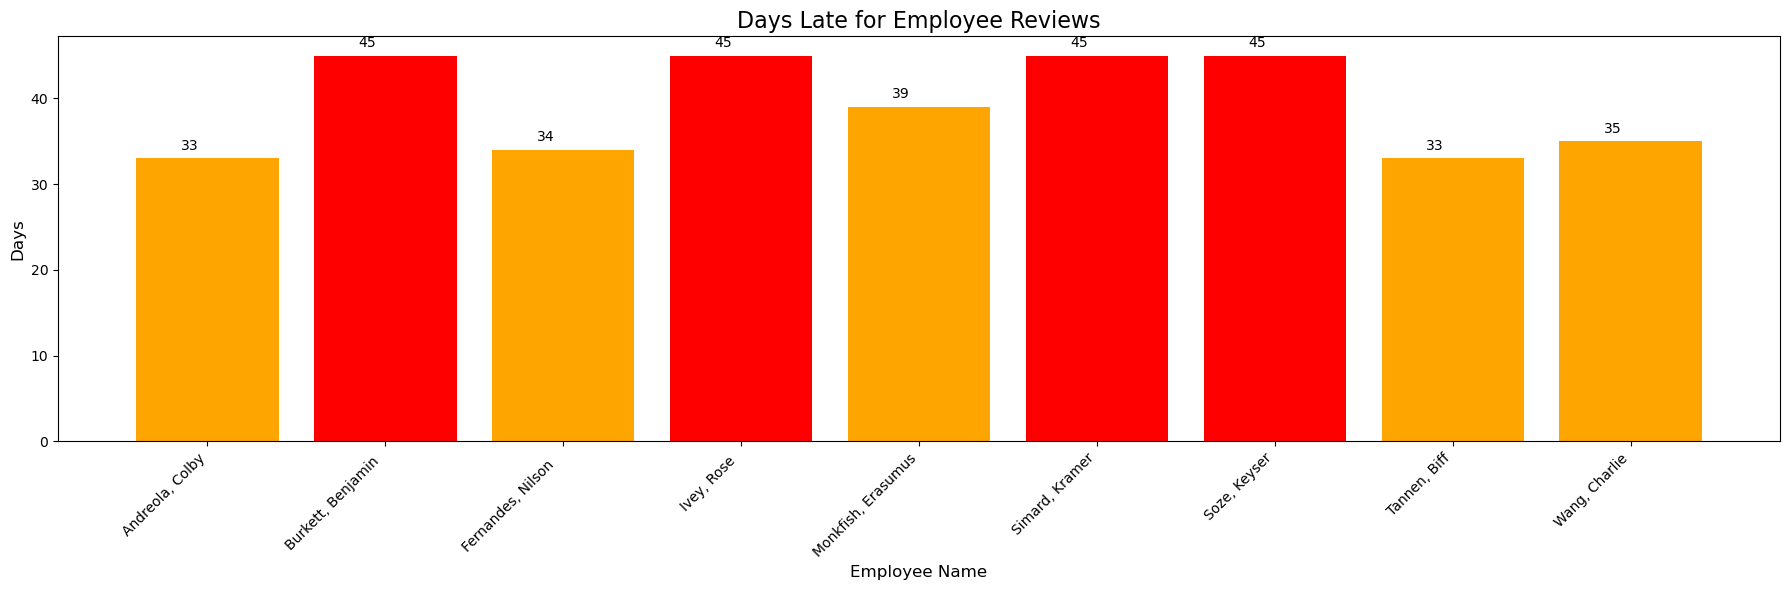

In [141]:
# Data
days = [33, 45, 34, 45, 39, 45, 45, 33, 35]
employee_names = final_review["Employee_Name"]

# Custom colors for bars
colors = ['red' if day >= 40 else 'orange' for day in days]

# Create the bar chart
plt.figure(figsize=(18, 6))
bars = plt.bar(x=employee_names, height=days, color=colors)

# Add labels and title
plt.xlabel('Employee Name', fontsize=12)
plt.ylabel('Days', fontsize=12)
plt.title('Days Late for Employee Reviews', fontsize=16)

# Annotate bars with their values
for bar, day in zip(bars, days):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1, str(day), fontsize=10, color='black')

# Customize x-axis labels for better readability (e.g., rotating them)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [154]:
review_df.columns

Index(['Employee_Name', 'EmpID', 'DateofHire', 'LastPerformanceReview_Date',
       'EmploymentStatus', 'Absences', 'DaysLateLast30', 'EngagementSurvey',
       'LastPerformanceReview_Year', 'LastPerformanceReview_Month',
       'LastPerformanceReview_Day', 'LastPerformanceReview_MonthYear'],
      dtype='object')

### Descriptive Statistics on Salary

In [155]:
hr_df = pd.DataFrame(describe(HR["Salary"])._asdict())

In [156]:
salary_ds = describe(HR["Salary"])._asdict()
display(pd.DataFrame([salary_ds], columns = salary_ds.keys()))

,nobs,minmax,mean,variance,skewness,kurtosis
0,311,"(45046, 250000)",69020.684887,6.328564e+08,3.290213,15.185607


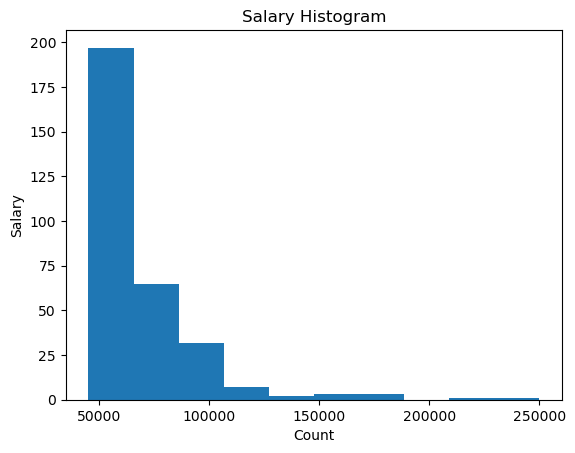

In [191]:
plt.hist(HR["Salary"])
plt.xlabel("Count")
plt.ylabel("Salary")
plt.title("Salary Histogram")
plt.show()

### Descriptive Statistics on Engagement and Employee Satisfaction

In [158]:
HR["EngagementSurvey"]

0      4.60
1      4.96
2      3.02
3      4.84
4      5.00
       ... 
306    4.07
307    3.20
308    4.60
309    5.00
310    4.50
Name: EngagementSurvey, Length: 311, dtype: float64

In [159]:
# Descriptive Statistics on Employee Satisfaction
engagement_ds = describe(HR["EngagementSurvey"])._asdict()
display(pd.DataFrame([engagement_ds], columns=engagement_ds.keys()))

esatis_ds = describe(HR["EmpSatisfaction"])._asdict()
display(pd.DataFrame([esatis_ds], columns=esatis_ds.keys()))


,nobs,minmax,mean,variance,skewness,kurtosis
0,311,"(1.12, 5.0)",4.11,0.624001,-1.111585,1.12669


,nobs,minmax,mean,variance,skewness,kurtosis
0,311,"(1, 5)",3.890675,0.826719,-0.221534,-0.769625


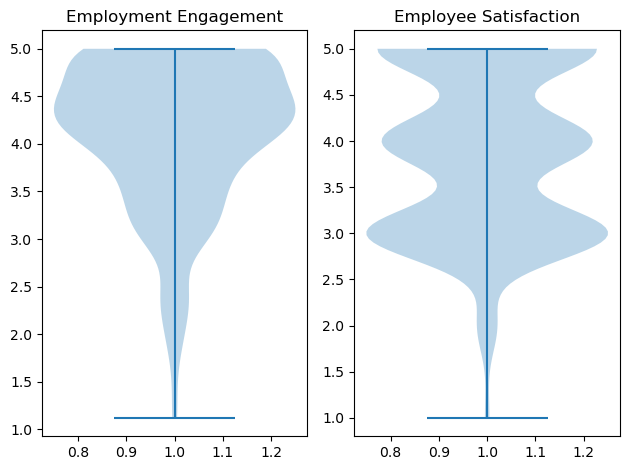

In [160]:
fig, axs = plt.subplots(1, 2)

axs[0].violinplot(HR["EngagementSurvey"])
axs[0].set_title("Employment Engagement")

axs[1].violinplot(HR["EmpSatisfaction"])
axs[1].set_title("Employee Satisfaction")

plt.tight_layout()
plt.show()

### Correlation between engagement x performance and salary x performance

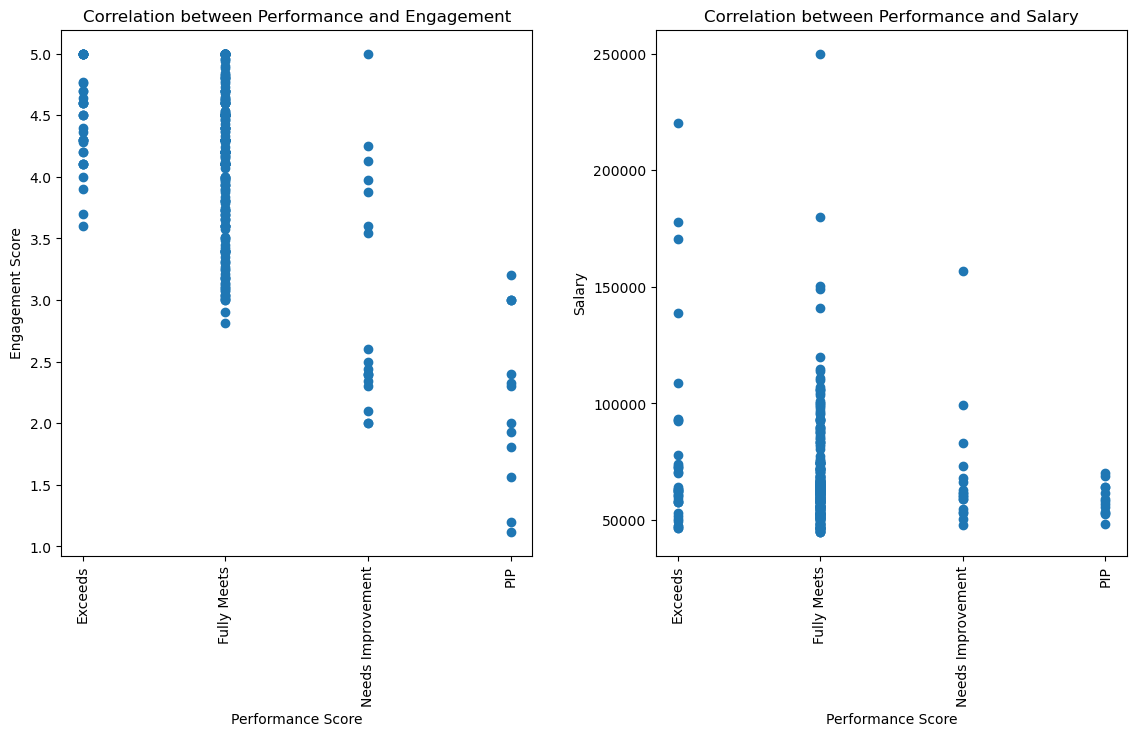

In [192]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))  # Increase the figure size if needed

axs[0].scatter(HR["PerformanceScore"], HR["EngagementSurvey"])
axs[0].set_title("Correlation between Performance and Engagement")
axs[0].set_xlabel("Performance Score")  # Add x-axis label
axs[0].set_ylabel("Engagement Score")  # Add y-axis label
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

axs[1].scatter(HR["PerformanceScore"], HR["Salary"])
axs[1].set_title("Correlation between Performance and Salary")
axs[1].set_xlabel("Performance Score")  # Add x-axis label
axs[1].set_ylabel("Salary")  # Add y-axis label
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

plt.tight_layout(pad=3)  # Increase the padding between subplots

plt.show()

#### Correlation between Engagement and Satisfaction

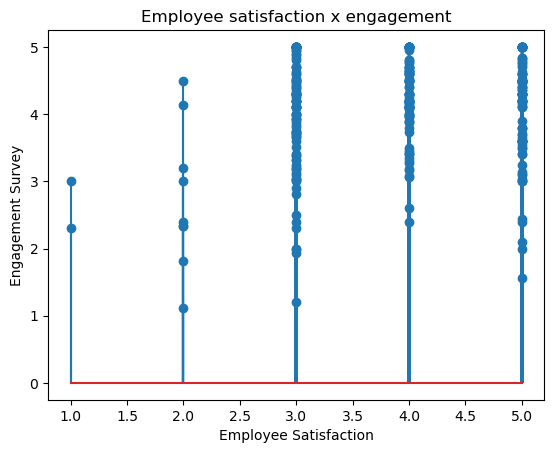

In [199]:
plt.stem(HR["EmpSatisfaction"], HR["EngagementSurvey"])
plt.xlabel("Employee Satisfaction")
plt.ylabel("Engagement Survey")
plt.title("Employee satisfaction x engagement")

plt.show()

### Correlation between number of Special Projects and Salary

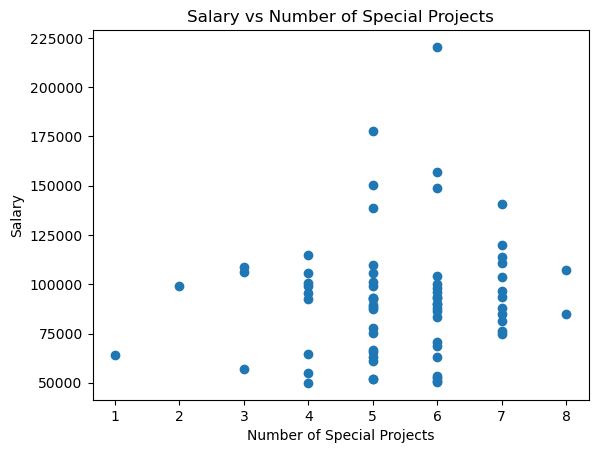

In [198]:
special_projects = HR[HR["SpecialProjectsCount"] > 0]

plt.scatter(special_projects["SpecialProjectsCount"], special_projects["Salary"])
plt.xlabel("Number of Special Projects")
plt.ylabel("Salary")
plt.title("Salary vs Number of Special Projects")

plt.show()

### Correlation between Absences, DaysLate30 and PerformanceScore

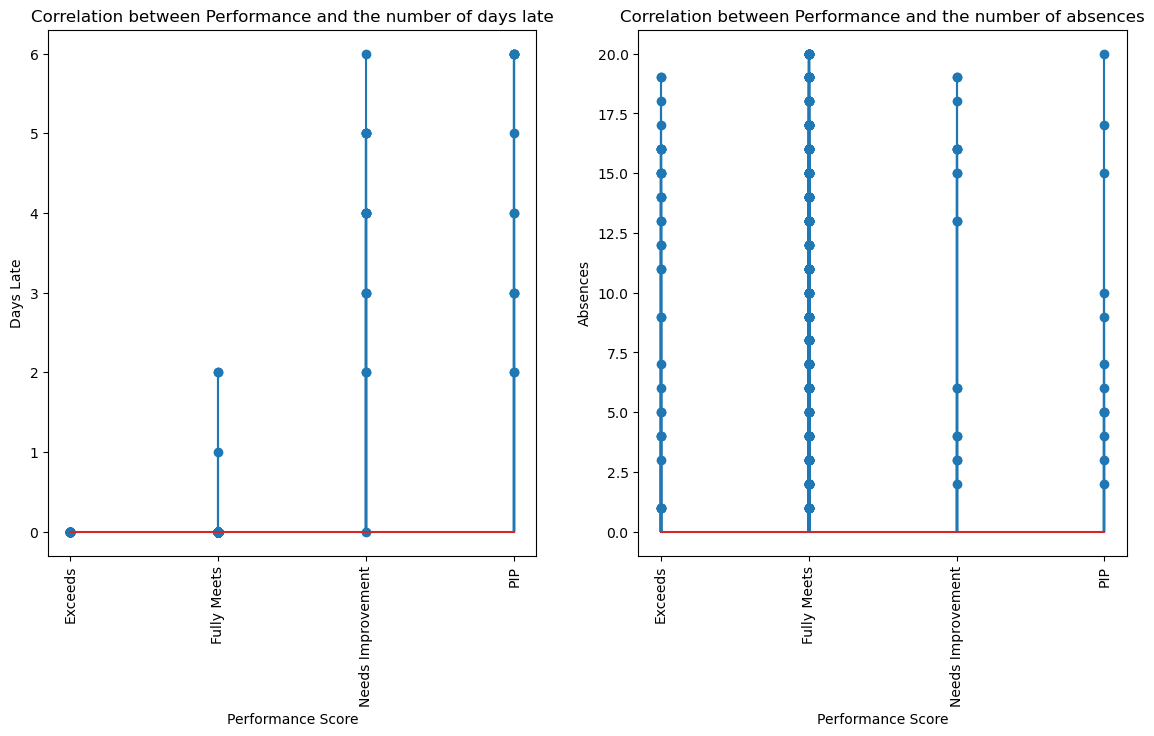

In [194]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))  # Increase the figure size if needed

axs[0].stem(HR["PerformanceScore"], HR["DaysLateLast30"])
axs[0].set_title("Correlation between Performance and the number of days late")
axs[0].set_xlabel("Performance Score")  # Add x-axis label
axs[0].set_ylabel("Days Late")  # Add y-axis label
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

axs[1].stem(HR["PerformanceScore"], HR["Absences"])
axs[1].set_title("Correlation between Performance and the number of absences")
axs[1].set_xlabel("Performance Score")  # Add x-axis label
axs[1].set_ylabel("Absences")  # Add y-axis label
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

plt.tight_layout(pad=3)  # Increase the padding between subplots

plt.show()